<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Привет, Сергей. А вот и модельная часть от тебя! Пошёл смотреть..</p>
</div>

 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ ТИМЛИДА</u></b>

Здравствуй Сергей!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Исследовательский анализ данных

## Описание проекта "Промышленность"

### Описание задачи

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

### Описание предметной области

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ок, описание самой проблематики перед её решением - то, что надо!

## Подготовка к выполнению проекта

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error

### Импорт данных

In [7]:
# Путь к директории данных.
PATH__DATA = r'/datasets/final_steel/'

# Полный путь к файлам.
DATA_ARC = PATH__DATA + r'data_arc.csv'
DATA_BULK = PATH__DATA + r'data_bulk.csv'
DATA_BULK_TIME = PATH__DATA + r'data_bulk_time.csv'
DATA_GAS = PATH__DATA + r'data_gas.csv'
DATA_TEMP = PATH__DATA + r'data_temp.csv'
DATA_WIRE = PATH__DATA + r'data_wire.csv'
DATA_WIRE_TIME = PATH__DATA + r'data_wire_time.csv'

### Настройки проекта

In [8]:
# Настройка случайного зерна.
GLOBAL__RANDOM_STATE = 29082022

# Доля данных для тестовой выборки.
TEST_PART = 0.2

# Настройка случайного зерна NumPy.
np.random.seed(GLOBAL__RANDOM_STATE)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>ОК, данные на базе) Идём дальше.

## Анализ данных

### Данные об электродах

In [9]:
# Загрузка данных об электродах.
df_arc = pd.read_csv(DATA_ARC)

In [10]:
# Проверка: вывод первых пяти строк.
df_arc.head()

key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.976059   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.805607   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.744363   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           1.659363   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.692755   

   Реактивная мощность  
0             0.687084  
1             0.520285  
2             0.498805  
3             1.062669  
4             0.414397

In [11]:
# Вывод общей информации о данных.
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [12]:
# Вывод основных статистик данных.
df_arc.describe()

key  Активная мощность  Реактивная мощность
count  14876.000000       14876.000000         14876.000000
mean    1615.220422           0.670441             0.452592
std      934.571502           0.408159             5.878702
min        1.000000           0.030002          -715.504924
25%      806.000000           0.395297             0.290991
50%     1617.000000           0.555517             0.415962
75%     2429.000000           0.857034             0.637371
max     3241.000000           3.731596             2.676388

#### Признак "key"

In [13]:
# Вывод количества записей о партиях.
df_arc['key'].value_counts().head(10)

2108    16
1689    15
1513    15
2567    14
46      13
322     13
1829    12
2916    12
44      12
1958    11
Name: key, dtype: int64

In [14]:
# Вывод количества уникальных партий.
df_arc['key'].nunique()

3214

#### Признак "Активная мощность"

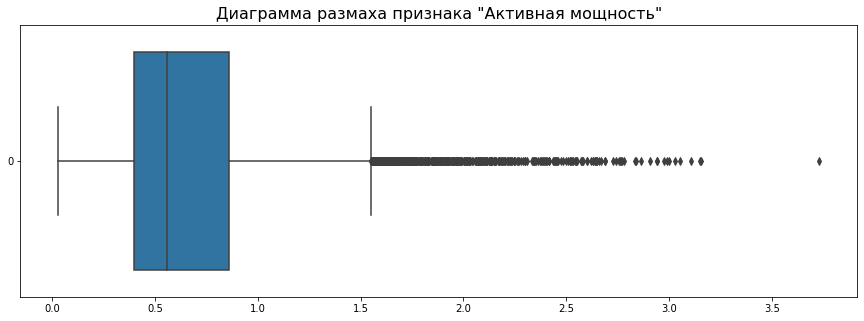

In [15]:
# Диаграмма размаха признака "Активная мощность".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc['Активная мощность'], orient='h')

plt.title('Диаграмма размаха признака "Активная мощность"', fontdict={'size': 16});

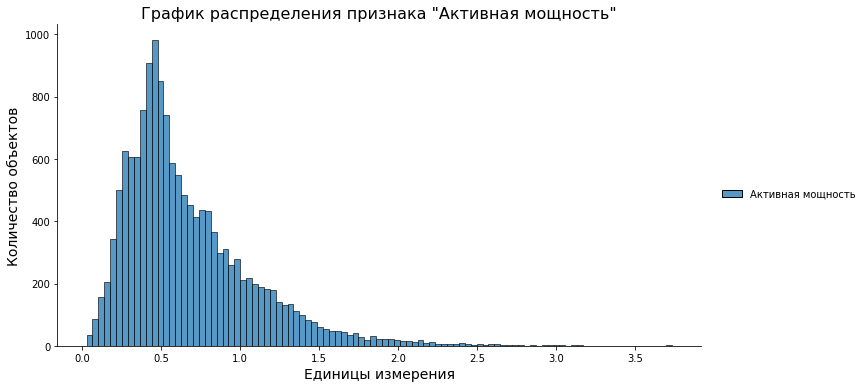

In [16]:
# График распределения признака "Активная мощность".

sns.displot(df_arc[['Активная мощность']], aspect=2)

plt.title('График распределения признака "Активная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>👍</p>
</div>

#### Признак "Реактивная мощность"

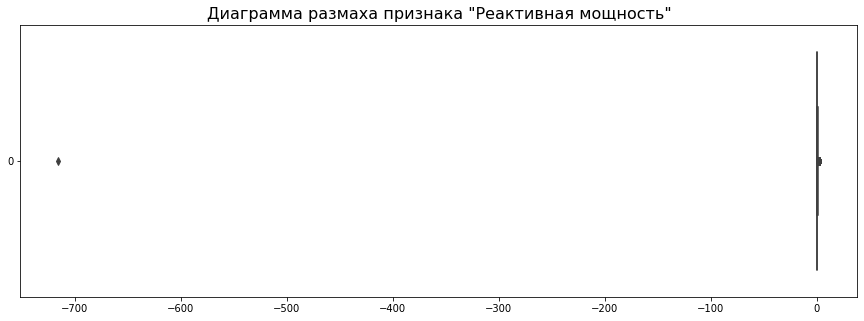

In [17]:
# Диаграмма размаха признака "Реактивная мощность".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc['Реактивная мощность'], orient='h')

plt.title('Диаграмма размаха признака "Реактивная мощность"', fontdict={'size': 16});

##### Эксперимент - применение моделей для поиска аномалий

In [18]:
# Изоляционный лес для поиска аномалий.
outlier_forest = IsolationForest(n_estimators=100, random_state=GLOBAL__RANDOM_STATE) 

In [19]:
# Поиск аномалий.
outlier_predict = outlier_forest.fit_predict(df_arc['Реактивная мощность'].values.reshape(-1, 1))

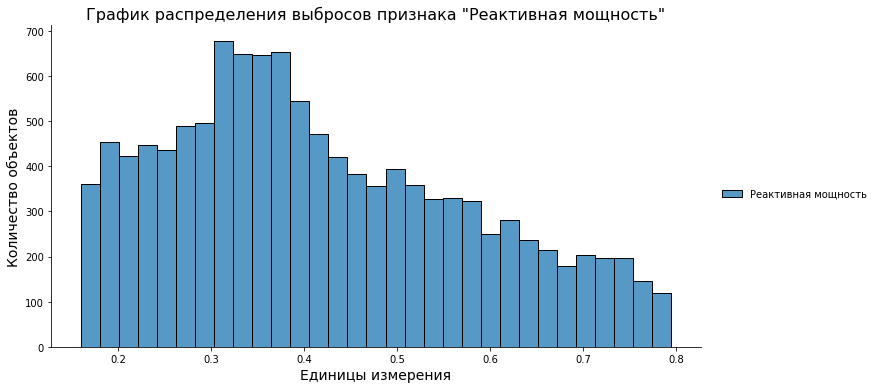

In [20]:
# График распределения выбросов признака "Реактивная мощность".

sns.displot(df_arc[['Реактивная мощность']][(outlier_predict == 1) & (df_arc['Реактивная мощность'] > -700)], aspect=2)

plt.title('График распределения выбросов признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

In [21]:
# Метод ближайших соседей для поиска аномалий.
outlier_knn = KNN(n_jobs=-1)

In [22]:
# Поиск аномалий.
outlier_predict = outlier_knn.fit_predict(df_arc['Реактивная мощность'].values.reshape(-1, 1))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


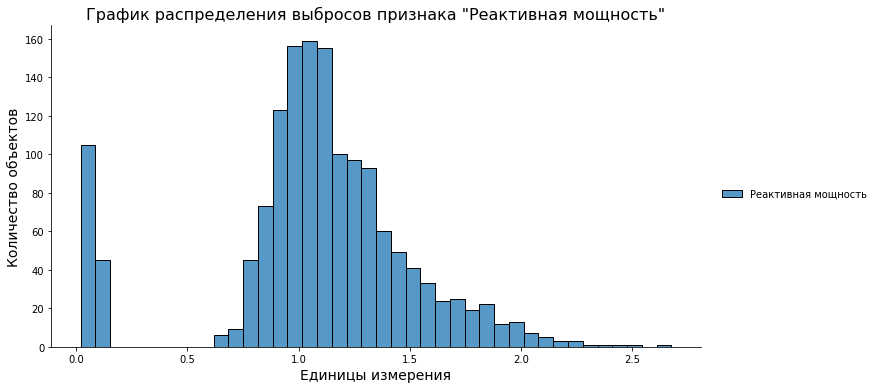

In [23]:
# График распределения выбросов признака "Реактивная мощность".

sns.displot(df_arc[['Реактивная мощность']][(outlier_predict == 1) & (df_arc['Реактивная мощность'] > -700)], aspect=2)

plt.title('График распределения выбросов признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

***Вывод***

Применение моделей машинного обучения для поиска аномалий не показало эффективности, так как большое количество ординарных объектов были помечены как выбросы.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Идея понятна. Но с выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>
    
В самой теории выбросов принято считать, что выбросы в интервале от q_3 + 1.5*irq до q_3 + з*irq - на усмотрение бизнеса. А вот всё, что больше q_3 + 3*irq - уже точно надо работать - на удаление!!!<br>
q_3 - верхняя квартиль<br>
irq - интерквартильный размах

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 выглядит вполне рабочим. В промышленной аналитике чаще всего выбросы - только ошибки датчкиов или выгрузки. В этом проекте, кроме супервыбросов (реактивная и несколько партий с температурой 1200) я бы ничего не удалял. И тогда модель будет с макисмальным рабочим диапазоном.

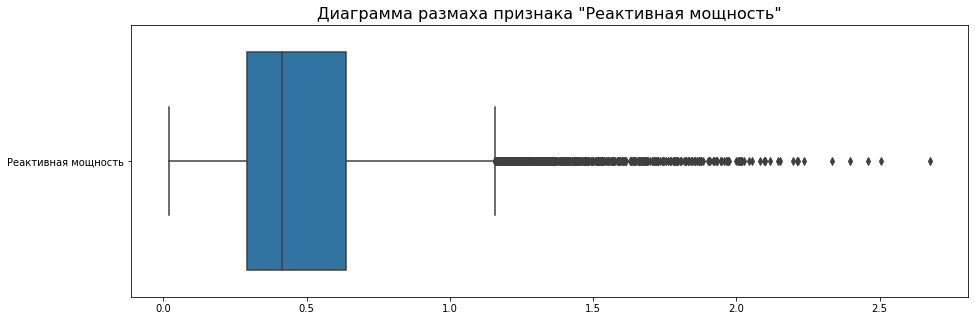

In [24]:
# Диаграмма размаха признака "Реактивная мощность" с фильтрацией.

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc[['Реактивная мощность']][df_arc['Реактивная мощность'] > -700], orient='h')

plt.title('Диаграмма размаха признака "Реактивная мощность"', fontdict={'size': 16});

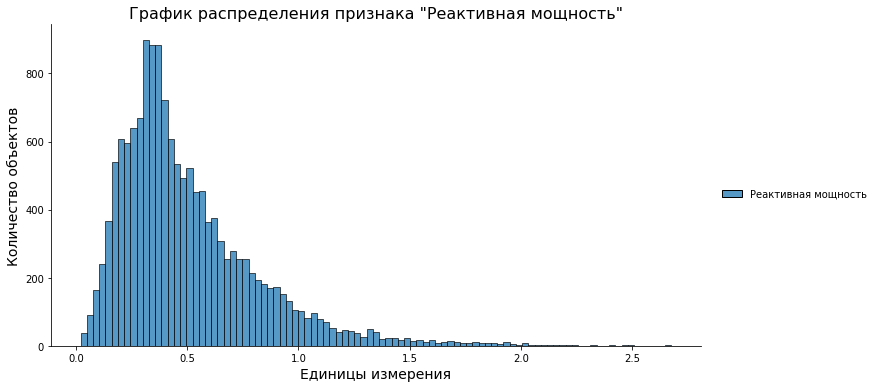

In [25]:
# График распределения признака "Реактивная мощность".

# sns.displot(df_arc[['Реактивная мощность']], aspect=2)
sns.displot(df_arc[['Реактивная мощность']][df_arc['Реактивная мощность'] > -700], aspect=2)

plt.title('График распределения признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Генерация разности признаков "Начало нагрева дугой" и "Конец нагрева дугой"

In [26]:
# Приведение признака "Конец нагрева дугой" к типу данных datetime64.
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'])

In [27]:
# Приведение признака "Начало нагрева дугой" к типу данных datetime64.
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'])

In [28]:
# Вычисление разницы признаков.
df_arc['time_diff'] = df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой']

In [29]:
# Проверка: вывод первых пяти строк.
df_arc['time_diff'].head()

0   0 days 00:03:48
1   0 days 00:03:05
2   0 days 00:02:52
3   0 days 00:06:05
4   0 days 00:02:28
Name: time_diff, dtype: timedelta64[ns]

In [30]:
# Перевод разницы признаков в секунды.
df_arc['time_diff_seconds'] = df_arc['time_diff'].dt.total_seconds()

In [31]:
# Проверка: вывод первых пяти строк.
df_arc['time_diff_seconds'].head()

0    228.0
1    185.0
2    172.0
3    365.0
4    148.0
Name: time_diff_seconds, dtype: float64

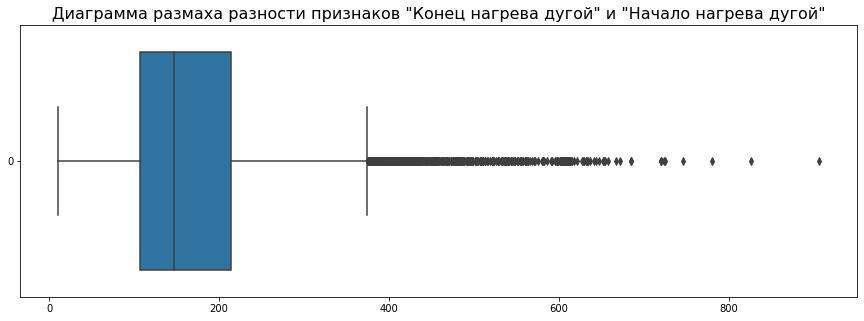

In [32]:
# Диаграмма размаха разности признаков.

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc['time_diff_seconds'], orient='h')

plt.title('Диаграмма размаха разности признаков "Конец нагрева дугой" и "Начало нагрева дугой"', fontdict={'size': 16});

In [33]:
# Вывод основных статистик разницы признаков в секундах.
df_arc['time_diff_seconds'].describe()

count    14876.000000
mean       171.670946
std         98.186803
min         11.000000
25%        107.000000
50%        147.000000
75%        214.000000
max        907.000000
Name: time_diff_seconds, dtype: float64

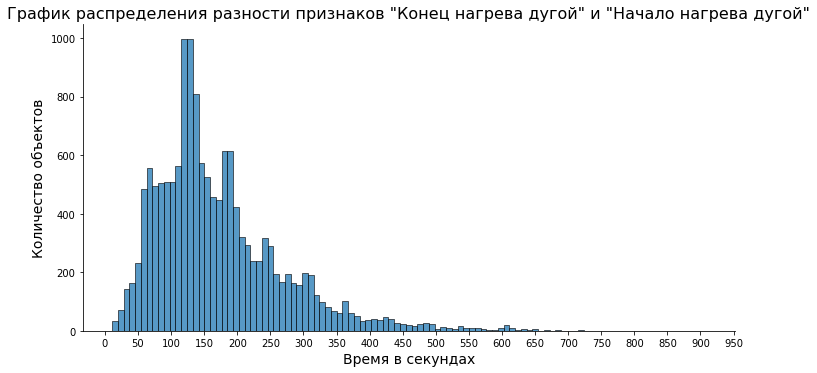

In [34]:
# График распределения разности признаков.

sns.displot(df_arc['time_diff_seconds'], aspect=2)

plt.xticks(range(0, 1000, 50))

plt.title('График распределения разности признаков "Конец нагрева дугой" и "Начало нагрева дугой"', fontdict={'size': 16})
plt.xlabel('Время в секундах', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Агрегация данных по партиям

In [35]:
# Агрегация данных по партиям.
df_arc_agg = df_arc.groupby(by='key').sum()

In [36]:
# Проверка: вывод первых пяти строк.
df_arc_agg.head()

Активная мощность  Реактивная мощность  time_diff_seconds
key                                                           
1             4.878147             3.183241             1098.0
2             3.052598             1.998112              811.0
3             2.525882             1.599076              655.0
4             3.209250             2.060298              741.0
5             3.347173             2.252643              869.0

In [37]:
# Вывод основных статистик данных.
df_arc_agg.describe()

Активная мощность  Реактивная мощность  time_diff_seconds
count        3214.000000          3214.000000        3214.000000
mean            3.103138             2.094821         794.579029
std             1.397390            12.689508         332.448622
min             0.186226          -714.591636          57.000000
25%             2.126339             1.599018         571.000000
50%             2.990537             2.229869         770.000000
75%             3.901147             2.899141         983.000000
max            17.496497            12.587990        4189.000000

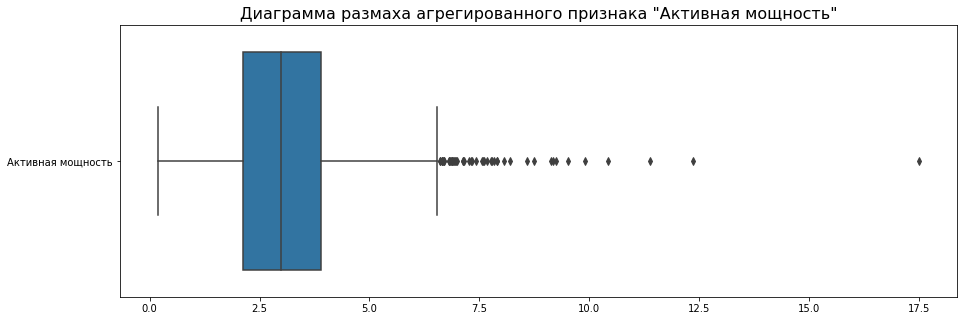

In [38]:
# Диаграмма размаха агрегированного признака "Активная мощность".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc_agg[['Активная мощность']], orient='h')

plt.title('Диаграмма размаха агрегированного признака "Активная мощность"', fontdict={'size': 16});

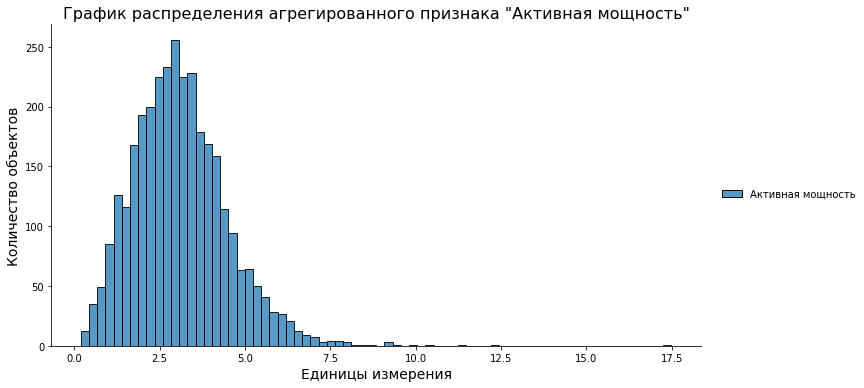

In [39]:
# График распределения агрегированного признака "Активная мощность".

sns.displot(df_arc_agg[['Активная мощность']], aspect=2)

plt.title('График распределения агрегированного признака "Активная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

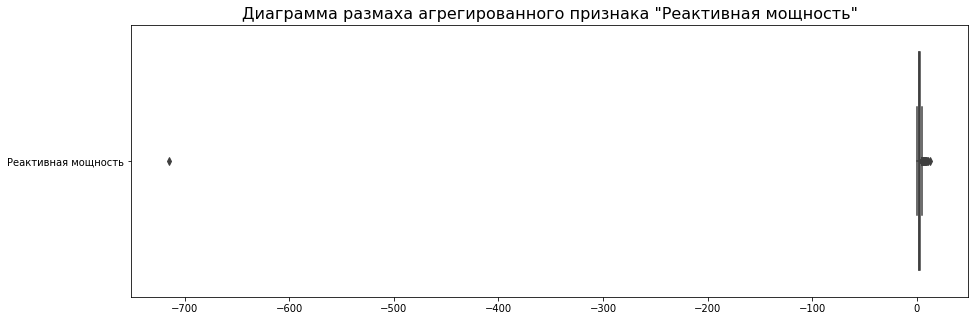

In [40]:
# Диаграмма размаха агрегированного признака "Реактивная мощность".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc_agg[['Реактивная мощность']], orient='h')

plt.title('Диаграмма размаха агрегированного признака "Реактивная мощность"', fontdict={'size': 16});

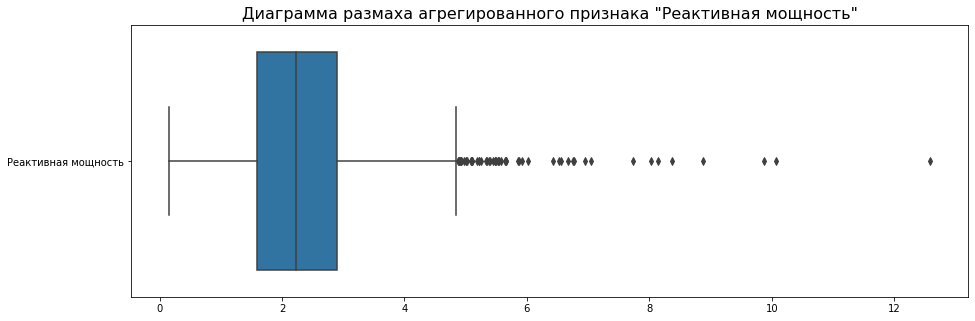

In [41]:
# Диаграмма размаха агрегированного признака "Реактивная мощность" с фильтрацией.

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc_agg[['Реактивная мощность']][df_arc_agg['Реактивная мощность'] > -700], orient='h')

plt.title('Диаграмма размаха агрегированного признака "Реактивная мощность"', fontdict={'size': 16});

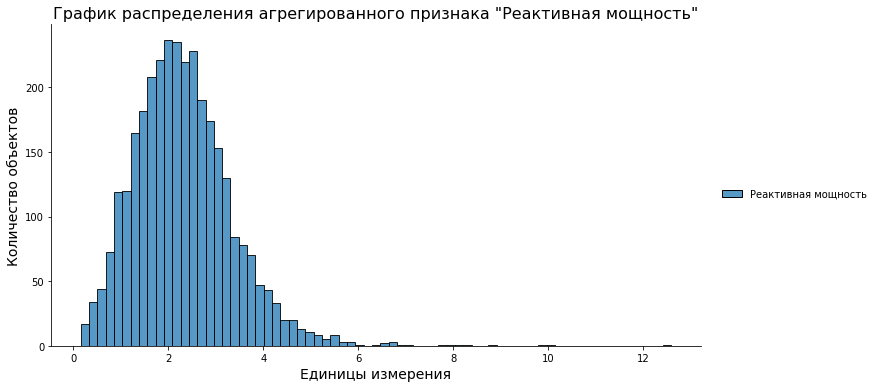

In [42]:
# График распределения агрегированного признака "Реактивная мощность".

sns.displot(df_arc_agg[['Реактивная мощность']][df_arc_agg['Реактивная мощность'] > -700], aspect=2)

plt.title('График распределения агрегированного признака "Реактивная мощность"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

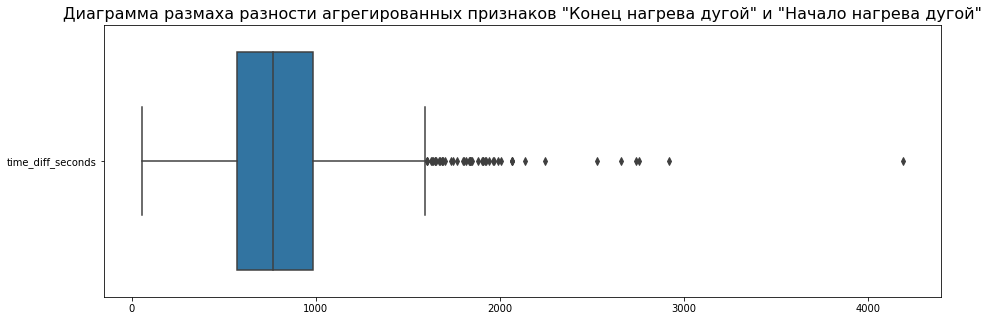

In [43]:
# Диаграмма размаха разности агрегированных признаков.

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_arc_agg[['time_diff_seconds']], orient='h')

plt.title(
    'Диаграмма размаха разности агрегированных признаков "Конец нагрева дугой" и "Начало нагрева дугой"',
    fontdict={'size': 16}
);

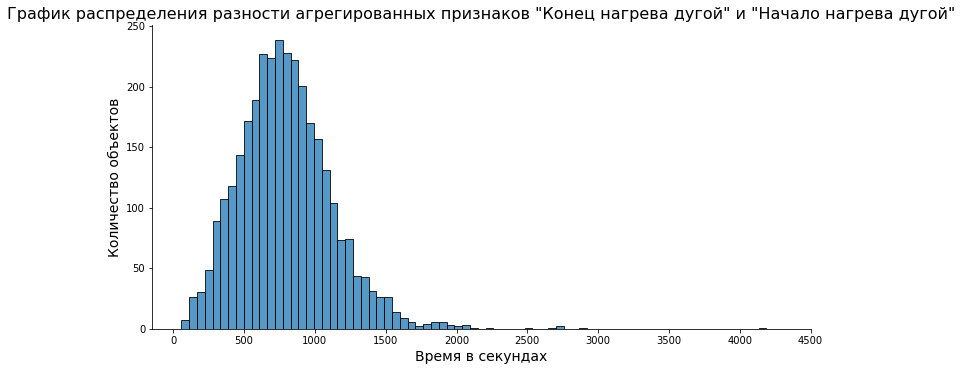

In [44]:
# График распределения разности агрегированных признаков.

sns.displot(df_arc_agg['time_diff_seconds'], aspect=2)

plt.xticks(range(0, 5000, 500))

plt.title(
    'График распределения разности агрегированных признаков "Конец нагрева дугой" и "Начало нагрева дугой"',
    fontdict={'size': 16}
)

plt.xlabel('Время в секундах', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных об электродах `data_arc.csv` было установлено следующее:


1. Данные не содержат пропусков.


2. Данные могут содержать аномалии. Так, в случае с признаком `Реактивная мощность`, было обнаружено сильно выбивающееся значение < -700, что с высокой вероятностью может быть выбросом. Диаграмма размаха для данного признака также показала наличие выбросов в области значений от 1.2 до 2.7. Однако доподлинно неизвестно, могут ли значения вне границ также быть выбросами.


3. Диаграмма размаха значений признака `Активная мощность` также показала наличие выбросов вне верхнего интервала, значения более 1.5. Характер данных не позволяет однозначно определить аномалии это или нет.


4. На основе признаков `Конец нагрева дугой` и `Начало нагрева дугой` был сгенерирован новый признак `time_diff_seconds`, который отражает разность признаков в секундах. Согласно диаграмме размаха нового признака, значения более ~380 секунд являются выбивающимися. Большинство значений сгруппировано в интервале от 50 до 250 секунд.


5. Из-за итеративной обработки некоторые партии сырья содержат несколько записей об электродах, что позволило выполнить агрегацию по номеру партии `key`.


6. Агрегация данных показала наличие партий с суммарной продолжительностью нагрева более 1 часа, что является выбивающимся значением при средней продолжительности нагрева не более получаса. Данная партия с высокой долей вероятности является аномалией.


7. Применение моделей машинного обучения для поиска аномалий не показало эффективности, так как большое количество ординарных объектов были помечены как выбросы

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
МОЛОДЕЦ, чёткая работа с анализом данных.По выбросам - напиал своё суждение)

### Данные о подаче сыпучих материалов (объём)

In [45]:
# Загрузка данных о подаче сыпучих материалов (объём).
df_bulk = pd.read_csv(DATA_BULK)

In [46]:
# Проверка: вывод первых пяти строк.
df_bulk.head()

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0

In [47]:
# Вывод общей информации о данных.
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [48]:
# Вывод основных статистик данных.
df_bulk[df_bulk.columns[1:]].describe().T

count        mean         std    min     25%    50%     75%     max
Bulk 1    252.0   39.242063   18.277654   10.0   27.00   31.0   46.00   185.0
Bulk 2     22.0  253.045455   21.180578  228.0  242.00  251.5  257.75   325.0
Bulk 3   1298.0  113.879045   75.483494    6.0   58.00   97.5  152.00   454.0
Bulk 4   1014.0  104.394477   48.184126   12.0   72.00  102.0  133.00   281.0
Bulk 5     77.0  107.025974   81.790646   11.0   70.00   86.0  132.00   603.0
Bulk 6    576.0  118.925347   72.057776   17.0   69.75  100.0  157.00   503.0
Bulk 7     25.0  305.600000  191.022904   47.0  155.00  298.0  406.00   772.0
Bulk 8      1.0   49.000000         NaN   49.0   49.00   49.0   49.00    49.0
Bulk 9     19.0   76.315789   21.720581   63.0   66.00   68.0   70.50   147.0
Bulk 10   176.0   83.284091   26.060347   24.0   64.00   86.5  102.00   159.0
Bulk 11   177.0   76.819209   59.655365    8.0   25.00   64.0  106.00   313.0
Bulk 12  2450.0  260.471020  120.649269   53.0  204.00  208.0  316.00  1849.0
Bulk 13    18.0  181.111111   46.088009  151.0  153.25  155.5  203.50   305.0
Bulk 14  2806.0  170.284747   65.868652   16.0  119.00  151.0  205.75   636.0
Bulk 15  2248.0  160.513345   51.765319    1.0  105.00  160.0  205.00   405.0

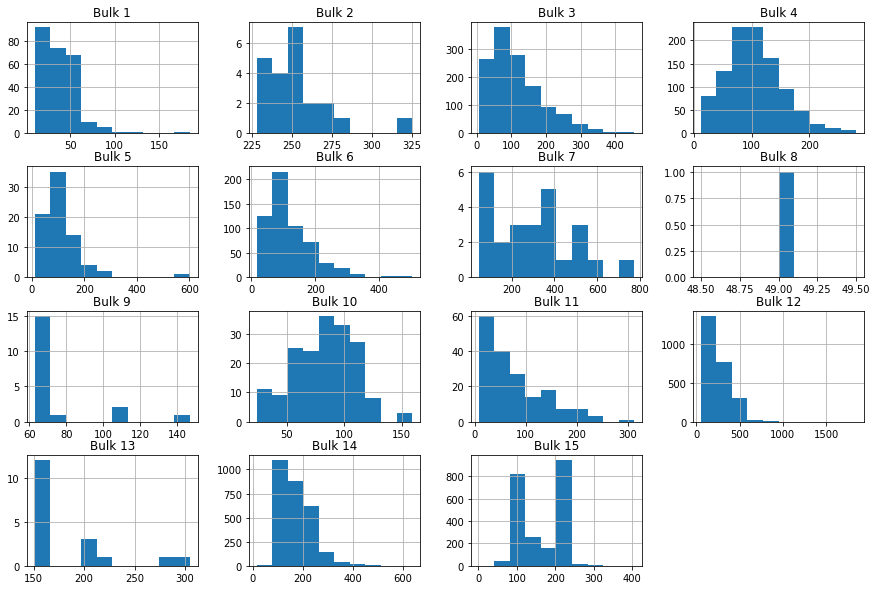

In [49]:
# Построение графиков распределения значений всех признаков.
df_bulk[df_bulk.columns[1:]].hist(figsize=(15, 10));

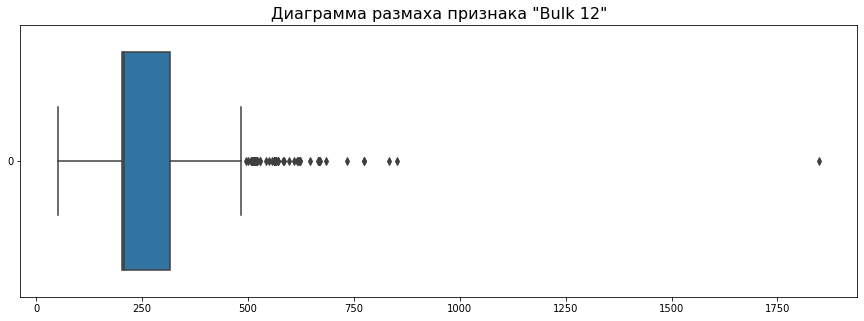

In [50]:
# Диаграмма размаха признака "Bulk 12".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_bulk['Bulk 12'], orient='h')

plt.title('Диаграмма размаха признака "Bulk 12"', fontdict={'size': 16});

#### Признак "key"

In [51]:
# Вывод количества записей о партиях.
df_bulk['key'].value_counts().head(10)

2049    1
2612    1
2588    1
541     1
2590    1
543     1
2592    1
545     1
2594    1
547     1
Name: key, dtype: int64

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
это не признак, его в модель не стоит вводить. Это просто набор чисел.

In [52]:
# Вывод количества уникальных партий.
df_bulk['key'].nunique()

3129

#### Пропуски

In [53]:
# Вывод информации об объектах с пропусками.
pd.DataFrame(
    pd.concat([
        df_bulk.isna().sum(1).value_counts(),
        df_bulk.isna().sum(1).value_counts(normalize=True).apply(lambda x: f'{x:.2%}')
    ], axis=1)
).rename(columns={0: 'Количество объектов', 1: 'Доля объектов'})

Количество объектов Доля объектов
11                 1439        45.99%
10                  510        16.30%
12                  500        15.98%
13                  312         9.97%
14                  296         9.46%
9                    71         2.27%
8                     1         0.03%

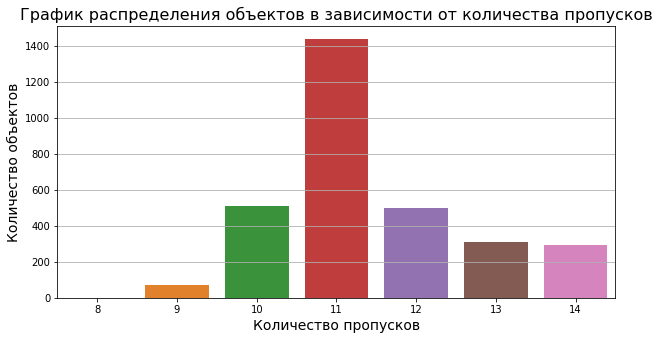

In [54]:
# График распределения объектов в зависимости от количества пропусков.
plt.figure(figsize=(10, 5))

sns.barplot(
    x=[*df_bulk.isna().sum(1).value_counts().index],
    y=[*df_bulk.isna().sum(1).value_counts().values]
)

plt.grid(axis='y')

plt.title('График распределения объектов в зависимости от количества пропусков', fontdict={'size': 16})
plt.xlabel('Количество пропусков', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных о подаче сыпучих материалов (объём) `data_bulk.csv` было установлено следующее:


1. Данные содержат пропуски. Большинство объектов, чуть менее половины всей выборки, имеют 11 пропусков в 15 признаках. Остальные объекты имеют от 8 до 14 пропусков. Данные пропуски могут быть интерпретированы как отсутствие информации о подаче матриалов. Таким образом, пропуски могут быть заполнены нулевыми значениями.


2. Количество уникальных номеров партий `key` равно количеству записей в датасете. Это значит, что каждая партия представлена одной строкой. Также разные партии имеют разное количество итераций подачи сыпучих материалов.


3. Количество уникальных номеров партий `key` меньше, чем в данных об электродах. Это значит, что не для всех партий имеются данные о подаче сыпучих материалов.


4. Анализ основных статистик и диаграммы размаха признака `df_bulk` позволил установить наличие выброса со значением 1849 единиц, что значительно отличается от основной массы объектов в данных.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С аналитикой понятно. Напомню, что кей - не бизнес-признак, его использовать не надо.

### Данные о подаче сыпучих материалов (время)

In [55]:
# Загрузка данных о подаче сыпучих материалов (время).
df_bulk_time = pd.read_csv(DATA_BULK_TIME)

In [56]:
# Проверка: вывод первых пяти строк.
df_bulk_time.head()

key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:21:30    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:46:38    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:31:06    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:48:43    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:18:50    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11:03:52     NaN  2019-05-03 11:03:52   
1    NaN     NaN     NaN  2019-05-03 11:40:20     NaN  2019-05-03 11:40:20   
2    NaN     NaN     NaN  2019-05-03 12:09:40     NaN  2019-05-03 12:09:40   
3    NaN     NaN     NaN  2019-05-03 12:41:24     NaN  2019-05-03 12:41:24   
4    NaN     NaN     NaN  2019-05-03 13:12:56     NaN  2019-05-03 13:12:56   

               Bulk 15  
0  2019-05-03 11:03:52  
1  2019-05-03 11:40:20  
2  2019-05-03 12:09:40  
3  2019-05-03 12:41:24  
4  2019-05-03 13:12:56

In [57]:
# Приведение типов данных к datetime64.
for column in df_bulk_time.columns[1:]:
    df_bulk_time[column] = pd.to_datetime(df_bulk_time[column])

In [58]:
# Вывод общей информации о данных.
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [59]:
# Количество объектов, где время 'Bulk 12' равно времени 'Bulk 14'.
(df_bulk_time['Bulk 12'] == df_bulk_time['Bulk 14']).sum()

2307

In [60]:
# Количество объектов, где время 'Bulk 12' равно времени 'Bulk 15'.
(df_bulk_time['Bulk 12'] == df_bulk_time['Bulk 15']).sum()

2153

In [61]:
# Количество объектов, где время 'Bulk 4' больше времени 'Bulk 12'.
(df_bulk_time['Bulk 4'] > df_bulk_time['Bulk 12']).sum()

803

#### Выводы

В ходе анализа данных о подаче сыпучих материалов (время) `data_bulk_time.csv` было установлено следующее:


1. Данные содержат пропуски.


2. Данные противоречивы: существенная часть записей имеет дублирующиеся значения признаков, а в некоторых случаях хронология нарушена.


Таким образом, ценность данной ифнормации может быть поставлена под сомнение.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
точно)

### Данные о продувке сплава газом

In [62]:
# Загрузка данных о подаче сыпучих материалов (время).
df_gas = pd.read_csv(DATA_GAS)

In [63]:
# Проверка: вывод первых пяти строк.
df_gas.head()

key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692

In [64]:
# Вывод общей информации о данных.
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [65]:
# Вывод основных статистик данных.
df_gas.describe()

key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040

#### Признак "key"

In [66]:
# Вывод количества записей о партиях.
df_gas['key'].value_counts().head(10)

2049    1
3135    1
3115    1
1070    1
3119    1
1074    1
3123    1
1078    1
3127    1
1082    1
Name: key, dtype: int64

In [67]:
# Вывод количества уникальных партий.
df_gas['key'].nunique()

3239

#### Признак "Газ 1"

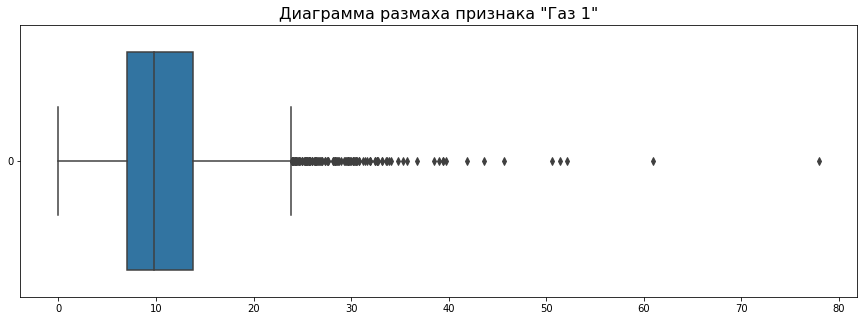

In [68]:
# Диаграмма размаха признака "Газ 1".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_gas['Газ 1'], orient='h')

plt.title('Диаграмма размаха признака "Газ 1"', fontdict={'size': 16});

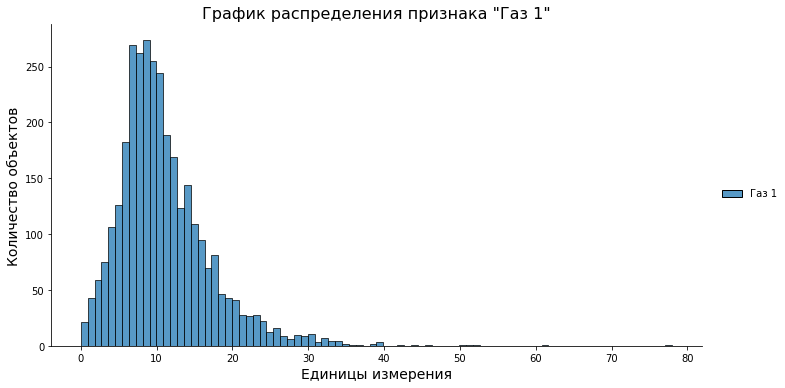

In [69]:
# График распределения признака "Газ 1".

sns.displot(df_gas[['Газ 1']], aspect=2)

plt.title('График распределения признака "Газ 1"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных о продувке сплава газом `data_gas.csv` было установлено следующее:


1. Данные не содержат пропусков.


2. Количество уникальных номеров партий `key` равно количеству записей в датасете. Это значит, что каждая партия представлена одной строкой.


3. Количество уникальных номеров партий `key` превосходит аналогичный показатель у данных об электродах и сыпучих материалов. Это значит, что не все партии с газом будут востребованы.


4. Диаграмма размаха признака `Газ 1` показала наличие выбросов. При этом вне границ наблюдаются сгруппированные значения до отметки 50 единиц. Данные значения соответствуют тенденции графика плавного убывания количества объектов с ростом единиц измерения. Также присутствуют разрозненные значения в интервале от 50 до 80 единиц измерения, которые малочисленны и сильно контрастируют на фоне основного скопления объектов. Данные значения являются выбросами.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
тааааак, принято. (кроме кей))

### Данные о проволочных материалах (объём)

In [70]:
# Загрузка данных о проволочных материалах (объём).
df_wire = pd.read_csv(DATA_WIRE)

In [71]:
# Проверка: вывод первых пяти строк.
df_wire.head()

key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [72]:
# Вывод общей информации о данных.
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [73]:
# Вывод основных статистик данных.
df_wire[df_wire.columns[1:]].describe().T

count        mean        std        min        25%         50%  \
Wire 1  3055.0  100.895853  42.012518   1.918800  72.115684  100.158234   
Wire 2  1079.0   50.577323  39.320216   0.030160  20.193680   40.142956   
Wire 3    63.0  189.482681  99.513444   0.144144  95.135044  235.194977   
Wire 4    14.0   57.442841  28.824667  24.148801  40.807002   45.234282   
Wire 5     1.0   15.132000        NaN  15.132000  15.132000   15.132000   
Wire 6    73.0   48.016974  33.919845   0.034320  25.053600   42.076324   
Wire 7    11.0   10.039007   8.610584   0.234208   6.762756    9.017009   
Wire 8    19.0   53.625193  16.881728  45.076721  46.094879   46.279999   
Wire 9    29.0   34.155752  19.931616   4.622800  22.058401   30.066399   

               75%         max  
Wire 1  126.060483  330.314424  
Wire 2   70.227558  282.780152  
Wire 3  276.252014  385.008668  
Wire 4   76.124619  113.231044  
Wire 5   15.132000   15.132000  
Wire 6   64.212723  180.454575  
Wire 7   11.886057   32.847674  
Wire 8   48.089603  102.762401  
Wire 9   43.862003   90.053604

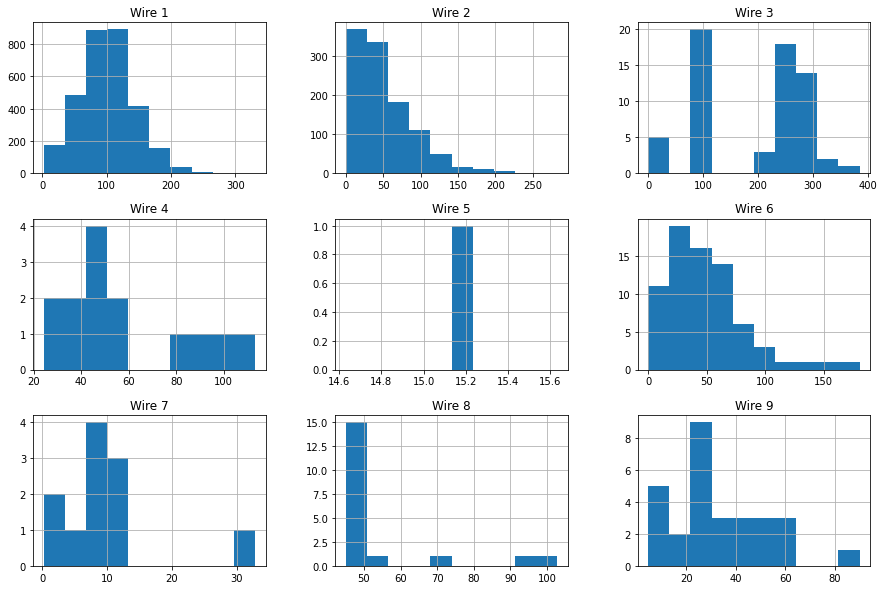

In [74]:
# Построение графиков распределения значений всех признаков.
df_wire[df_wire.columns[1:]].hist(figsize=(15, 10));

#### Признак "key"

In [75]:
# Вывод количества записей о партиях.
df_wire['key'].value_counts().head(10)

2049    1
2664    1
2590    1
543     1
2592    1
545     1
2594    1
547     1
2596    1
549     1
Name: key, dtype: int64

In [76]:
# Вывод количества уникальных партий.
df_wire['key'].nunique()

3081

#### Пропуски

In [77]:
# Вывод информации об объектах с пропусками.
pd.DataFrame(
    pd.concat([
        df_wire.isna().sum(1).value_counts(),
        df_wire.isna().sum(1).value_counts(normalize=True).apply(lambda x: f'{x:.2%}')
    ], axis=1)
).rename(columns={0: 'Количество объектов', 1: 'Доля объектов'})

Количество объектов Доля объектов
8                 1936        62.84%
7                 1045        33.92%
6                   88         2.86%
4                    6         0.19%
5                    6         0.19%

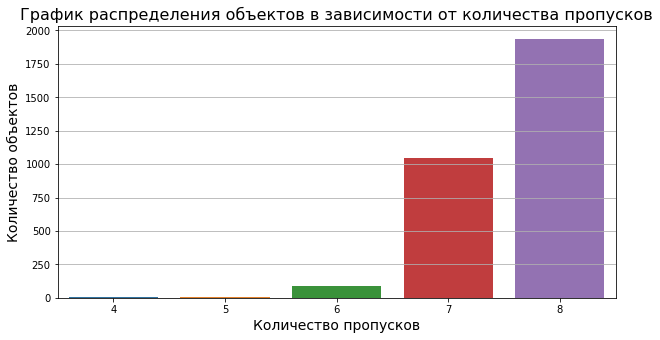

In [78]:
# График распределения объектов в зависимости от количества пропусков.
plt.figure(figsize=(10, 5))

sns.barplot(
    x=[*df_wire.isna().sum(1).value_counts().index],
    y=[*df_wire.isna().sum(1).value_counts().values]
)

plt.grid(axis='y')

plt.title('График распределения объектов в зависимости от количества пропусков', fontdict={'size': 16})
plt.xlabel('Количество пропусков', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных о проволочных материалах (объём) `data_wire.csv` было установлено следующее:


1. Данные содержат пропуски. Большинство объектов, чуть менее двух третей всей выборки, имеют 8 пропусков в 9 признаках. Остальные объекты имеют от 4 до 7 пропусков. Данные пропуски могут быть интерпретированы как отсутствие информации о подаче матриалов. Таким образом, пропуски могут быть заполнены нулевыми значениями.


2. Количество уникальных номеров партий `key` равно количеству записей в датасете. Это значит, что каждая партия представлена одной строкой. Также разные партии имеют разное количество итераций подачи проволочных материалов.


3. Количество уникальных номеров партий `key` меньше, чем в данных об электродах, подаче сыпучих материалов и продувке сплава газом. Это значит, что не для всех партий имеются данные о подаче проволочных материалов.

### Данные о проволочных материалах (время)

In [79]:
# Загрузка данных о проволочных материалах (объём).
df_wire_time = pd.read_csv(DATA_WIRE_TIME)

In [80]:
# Проверка: вывод первых пяти строк.
df_wire_time.head()

key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:11:41                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:46:10                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:13:47                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:48:05                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:18:15  2019-05-03 13:32:06    NaN    NaN    NaN    NaN   

  Wire 7 Wire 8 Wire 9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN

In [81]:
# Приведение типов данных к datetime64.
for column in df_wire_time.columns[1:]:
    df_wire_time[column] = pd.to_datetime(df_wire_time[column])

In [82]:
# Вывод общей информации о данных.
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


In [83]:
# Количество объектов, где время 'Bulk 12' равно времени 'Bulk 14'.
(df_wire_time['Wire 1'] >= df_wire_time['Wire 2']).sum()

25

#### Выводы

В ходе анализа данных о проволочных материалах (время) `data_wire_time.csv` было установлено следующее:


1. Данные содержат пропуски.


2. Часть данных противоречива: в некоторых случаях хронология нарушена.


В большинстве случаев, две трети объектов всей выборки, указана только одна дата и время. Также в большинстве случаев номер признака отражает хронологию подачи материалов. Данные обстоятельства ставят под сомнение полезность данных о времени подачи материалов.

### Данные о результатах измерения температуры

In [84]:
# Загрузка данных о результатах измерения температуры.
df_temp = pd.read_csv(DATA_TEMP)

In [85]:
# Проверка: вывод первых пяти строк.
df_temp.head()

key         Время замера  Температура
0    1  2019-05-03 11:16:18       1571.0
1    1  2019-05-03 11:25:53       1604.0
2    1  2019-05-03 11:29:11       1618.0
3    1  2019-05-03 11:30:01       1601.0
4    1  2019-05-03 11:30:39       1613.0

In [86]:
# Приведение типов данных к datetime64.
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'])

In [87]:
# Вывод общей информации о данных.
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


In [88]:
# Вывод основных статистик данных.
df_temp[df_temp.columns[1:]].describe()

Температура
count  13006.000000
mean    1591.840920
std       21.375851
min     1191.000000
25%     1581.000000
50%     1591.000000
75%     1601.000000
max     1705.000000

#### Признак "key"

In [89]:
# Вывод количества записей о партиях.
df_temp['key'].value_counts().head(10)

46      16
1214    16
1513    16
44      16
1689    15
2108    15
877     14
1051    13
2770    13
2567    13
Name: key, dtype: int64

In [90]:
# Вывод количества уникальных партий.
df_temp['key'].nunique()

3216

#### Признак "Температура"

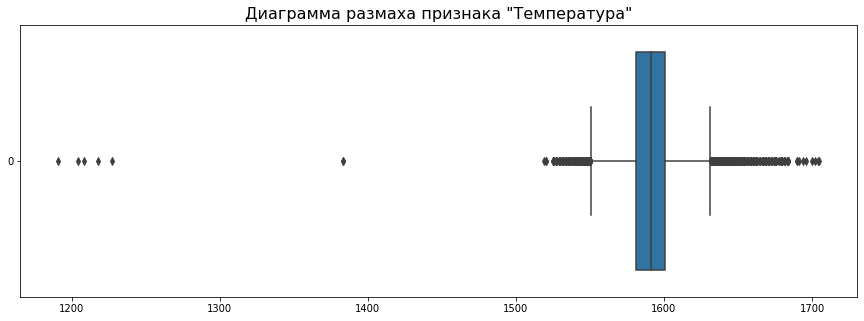

In [91]:
# Диаграмма размаха признака "Температура".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_temp['Температура'], orient='h')

plt.title('Диаграмма размаха признака "Температура"', fontdict={'size': 16});

In [92]:
# Вывод выбросов.
df_temp['Температура'][df_temp['Температура'] < 1400]

4350     1191.0
5978     1208.0
7958     1218.0
8913     1383.0
8914     1383.0
10127    1227.0
12564    1204.0
Name: Температура, dtype: float64

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Как и писал выше, отсечка 1500 кажется завышенной. Т.к. температура плавления около 1400 по паспорту)

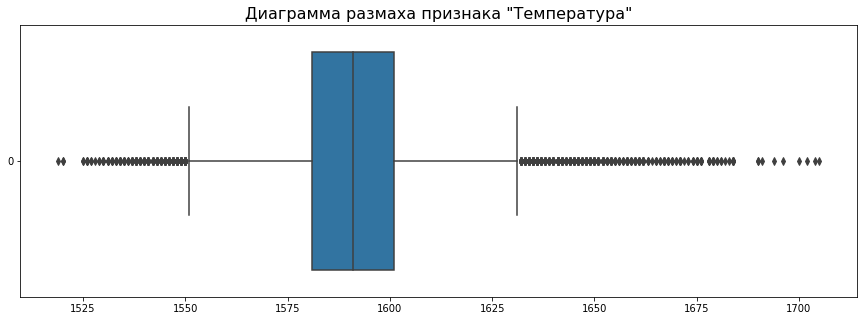

In [93]:
# Диаграмма размаха признака "Температура".

plt.figure(figsize=(15, 5))

sns.boxplot(data=df_temp['Температура'][df_temp['Температура'] > 1400], orient='h')

plt.title('Диаграмма размаха признака "Температура"', fontdict={'size': 16});

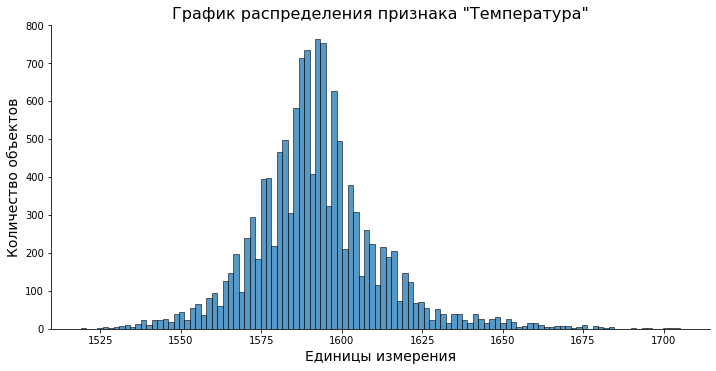

In [94]:
# График распределения признака "Температура".

sns.displot(df_temp['Температура'][df_temp['Температура'] > 1500], aspect=2)

plt.title('График распределения признака "Температура"', fontdict={'size': 16})
plt.xlabel('Единицы измерения', fontdict={'size': 14})
plt.ylabel('Количество объектов', fontdict={'size': 14});

#### Выводы

В ходе анализа данных о результатах измерения температуры `data_temp.csv` было установлено следующее:


1. Данные содержат пропуски. Логическое заполнение пропусков невозможно и приведёт к искажению тенденций в данных. Поэтому пропуски следует исключить.


2. Согласно диаграмме размаха и графику распределения признака `Температура`, в выборке содержатся выбросы. Причём большинство выбросов сгруппированы у границ интервала и могут быть объяснены распределением - редкие пограничные значения с двух сторон графика. Однако малочисленная часть значений, 6 штук, значительно контрастируют на фоне основного скопления объектов. Данные значения с высокой долей вероятности являются аномальными и также должны быть исключены из выборки.


3. Из-за итеративной обработки некоторые партии сырья содержат несколько записей о результатах измерения температуры. Начальная температура может быть использована как признак, конечная температура - целевая переменная.

# План выполнения проекта

Изучение предметной области, а также исследовательский анализ данных позволили установить требуемые критерии подготовки исходных данных, а также сформировать задачу машинного обучения - прогноз финальной температуры сырья.

**План**

1. Подготовка данных:
    - обработка пропусков;
    - обработка выбросов;
    - приведение типов данных;
    - генерация новых признаков;
    - подготовка широкой таблицы признаков;
    - проверка на коллинеарность;
    - разбиение на обучающую и тестовую выборки.


2. Построение модели машинного обучения:
    - формирование задачи и критерия оценки;
    - рассмотрение кандидатов для решения задачи;
    - индивидуальная подготовка признаков для моделей;
    - построение и валидация, выбор лучшей модели;
    - анализ важности признаков;
    - тестирование лучшей модели.


3. Документирование полученных результатов:
    - описание проекта и данных;
    - описание модели.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Сергей, с первичным анализом - всё как надо получилось: и аналитика и графика.<br>
И выводы логичные. Замечу только, что при удалении пустот в целевой - удалять лучше всю партию.<br>
    
Оставил несколько комментариев, посомтри, пожалуйста.<br> 
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя). А по выборкам так: мы договорились, что будет использовать кросс-валидацию. И тогда валидационная выборка нам и не нужна. ТОлько трайн и тест.<br>
Что ж, тогда вперёд к моделированию)<br>
Если возникнут вопросы - всегда в слаке сможем встретиться.

# Подготовка данных

## Обработка пропусков и выбросов, приведение типов данных

### Данные об электродах

В ходе исследовательского анализа данных была проведена генерация новых признаков совместно с агрегацией данных по каждой партии. Таким образом, для каждой партии указаны суммарные активная и реактивная мощности, а также общее время работы электродов.

Также было установлено, что в данных присутствуют выбросы:
- аномально низкая реактивная мощность, менее -700 единиц;
- аномальная длительность работы электродов, более часа.

Необходимо устранение выбросов. Так как смысловая интерпретация данных не позволяет выполнить коррекцию аномальных значений, всю аномальную партию следует исключить.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>ОК</p>
</div>

In [95]:
# Вывод первых пяти строк данных об электродах.
df_arc_agg.head()

Активная мощность  Реактивная мощность  time_diff_seconds
key                                                           
1             4.878147             3.183241             1098.0
2             3.052598             1.998112              811.0
3             2.525882             1.599076              655.0
4             3.209250             2.060298              741.0
5             3.347173             2.252643              869.0

In [96]:
# Вывод основных статистик данных об электродах.
df_arc_agg.describe()

Активная мощность  Реактивная мощность  time_diff_seconds
count        3214.000000          3214.000000        3214.000000
mean            3.103138             2.094821         794.579029
std             1.397390            12.689508         332.448622
min             0.186226          -714.591636          57.000000
25%             2.126339             1.599018         571.000000
50%             2.990537             2.229869         770.000000
75%             3.901147             2.899141         983.000000
max            17.496497            12.587990        4189.000000

In [97]:
# Вывод информации о датасете.
df_arc_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Активная мощность    3214 non-null   float64
 1   Реактивная мощность  3214 non-null   float64
 2   time_diff_seconds    3214 non-null   float64
dtypes: float64(3)
memory usage: 100.4 KB


In [98]:
# Устранение выбросов признака "Реактивная мощность".
df_arc_agg = df_arc_agg[df_arc_agg['Реактивная мощность'] > -700]

# Устранение выбросов признака "time_diff_seconds".
df_arc_agg = df_arc_agg[df_arc_agg['time_diff_seconds'] < 3600]

In [99]:
# Вывод информации о датасете.
df_arc_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3212 entries, 1 to 3241
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Активная мощность    3212 non-null   float64
 1   Реактивная мощность  3212 non-null   float64
 2   time_diff_seconds    3212 non-null   float64
dtypes: float64(3)
memory usage: 100.4 KB


In [100]:
# Вывод основных статистик данных об электродах.
df_arc_agg.describe()

Активная мощность  Реактивная мощность  time_diff_seconds
count        3212.000000          3212.000000        3212.000000
mean            3.099048             2.314682         793.634807
std             1.374368             1.038654         327.048924
min             0.186226             0.158247          57.000000
25%             2.126549             1.599056         571.000000
50%             2.990537             2.229869         770.000000
75%             3.900517             2.898375         983.000000
max            12.361625            10.072821        2919.000000

Две партии с аномальными значениями были устранены, что подтверждается основными статистиками данных.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Хорошо</p>
</div>

### Данные о подаче сыпучих материалов (объём)

Согласно анализу, в данных о подаче сыпучих материалов (объём) присутствуют пропуски, которые могут быть интерпретированы как отсутствие подачи - то есть, могут быть заполнены нулевыми значениями.

Также в данных был онаружен выброс, аномально большое значение объёма подачи материалов, которое искажает данные и должно быть устранено.

In [101]:
# Проверка: вывод первых пяти строк.
df_bulk.head()

key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0

In [102]:
# Вывод основных статистик данных.
df_bulk[df_bulk.columns[1:]].describe().T

count        mean         std    min     25%    50%     75%     max
Bulk 1    252.0   39.242063   18.277654   10.0   27.00   31.0   46.00   185.0
Bulk 2     22.0  253.045455   21.180578  228.0  242.00  251.5  257.75   325.0
Bulk 3   1298.0  113.879045   75.483494    6.0   58.00   97.5  152.00   454.0
Bulk 4   1014.0  104.394477   48.184126   12.0   72.00  102.0  133.00   281.0
Bulk 5     77.0  107.025974   81.790646   11.0   70.00   86.0  132.00   603.0
Bulk 6    576.0  118.925347   72.057776   17.0   69.75  100.0  157.00   503.0
Bulk 7     25.0  305.600000  191.022904   47.0  155.00  298.0  406.00   772.0
Bulk 8      1.0   49.000000         NaN   49.0   49.00   49.0   49.00    49.0
Bulk 9     19.0   76.315789   21.720581   63.0   66.00   68.0   70.50   147.0
Bulk 10   176.0   83.284091   26.060347   24.0   64.00   86.5  102.00   159.0
Bulk 11   177.0   76.819209   59.655365    8.0   25.00   64.0  106.00   313.0
Bulk 12  2450.0  260.471020  120.649269   53.0  204.00  208.0  316.00  1849.0
Bulk 13    18.0  181.111111   46.088009  151.0  153.25  155.5  203.50   305.0
Bulk 14  2806.0  170.284747   65.868652   16.0  119.00  151.0  205.75   636.0
Bulk 15  2248.0  160.513345   51.765319    1.0  105.00  160.0  205.00   405.0

In [103]:
# Вывод информации о датасете.
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [104]:
# Заполнение пропусков нулевыми значениями.
df_bulk = df_bulk.fillna(value=0)

# Устранение выбросов признака "Bulk 12".
df_bulk = df_bulk[df_bulk['Bulk 12'] < 1800]

In [105]:
# Проверка: вывод партий с нулевой подачей материалов.
df_bulk[df_bulk[df_bulk.columns[1:]].sum(1) == 0]

Empty DataFrame
Columns: [key, Bulk 1, Bulk 2, Bulk 3, Bulk 4, Bulk 5, Bulk 6, Bulk 7, Bulk 8, Bulk 9, Bulk 10, Bulk 11, Bulk 12, Bulk 13, Bulk 14, Bulk 15]
Index: []

Одна партия с аномальным значением была устранена, пропуски были заполнены нулевыми значениями.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>С длительность процесса - выброс точно. А вот с присадкой - может и нет. Возможно, что действительно столько и засыпали. Такие партии лучше уточнять у закзачика. Но закзачика у нас нет)) ОК.</p>
</div>

### Данные о продувке сплава газом

Анализ данных показал, что в данных о продувке сплава газом присутствуют выбивающиеся значения в интервале от 50 до 80 единиц. Данные значения контрастируют на фоне большинства объектов и могут привести к искажению данных, поэтому должны быть исключены.

In [106]:
# Проверка: вывод первых пяти строк.
df_gas.head()

key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692

In [107]:
# Вывод основных статистик данных.
df_gas[df_gas.columns[1:]].describe()

Газ 1
count  3239.000000
mean     11.002062
std       6.220327
min       0.008399
25%       7.043089
50%       9.836267
75%      13.769915
max      77.995040

In [108]:
# Вывод информации о датасете.
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [109]:
# Устранение выбросов признака "Газ 1".
df_gas = df_gas[df_gas['Газ 1'] < 50]

In [110]:
# Вывод информации о датасете.
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3234 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3234 non-null   int64  
 1   Газ 1   3234 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 75.8 KB


Пять партий с аномальными паказателями были устранены.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Как и писал выше, может это и не выбросы, всё же. Т.к. если процесс был длительный и много присадок, то и газа много затратили. Т.е. надо проверять такие моменты. Сразу не удалять!</p>
</div>

### Данные о проволочных материалах (объём)

Данные о проволочных материалах (объём) содержат пропуски, заполнение которых возможно нулевыми значениями: отсутствие информации сигнализирует об отсутствии подачи материалов.

In [111]:
# Проверка: вывод первых пяти строк.
df_wire.head()

key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [112]:
# Вывод общей информации о данных.
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [113]:
# Заполнение пропусков нулевыми значениями.
df_wire = df_wire.fillna(0)

In [114]:
# Проверка: вывод партий с нулевой подачей материалов.
df_wire[df_wire[df_wire.columns[1:]].sum(1) == 0]

Empty DataFrame
Columns: [key, Wire 1, Wire 2, Wire 3, Wire 4, Wire 5, Wire 6, Wire 7, Wire 8, Wire 9]
Index: []

Пропуски обработаны: заполнены нулевыми значениями.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Пропуски - нулём, согласен.</p>
</div>

### Данные о результатах измерения температуры

В данных о результатах измерения температуры содержатся пропуски и аномалии. Пропуски не могут быть спрогнозированы и заполнены, поэтому подлежат удалению. Также, согласно предметной области, температура плавления не должна быть ниже 1400 градусов, что позволяет считать выбросами объекты ниже указанного порога.

In [115]:
# Проверка: вывод первых пяти строк.
df_temp.head()

key        Время замера  Температура
0    1 2019-05-03 11:16:18       1571.0
1    1 2019-05-03 11:25:53       1604.0
2    1 2019-05-03 11:29:11       1618.0
3    1 2019-05-03 11:30:01       1601.0
4    1 2019-05-03 11:30:39       1613.0

In [116]:
# Удаление выбросов.
df_temp = df_temp[df_temp['Температура'] > 1400]

# Удаление пропусков.
df_temp = df_temp.dropna()

# Фильтрация партий, где указано больше одной температуры.
keys = df_temp.groupby(by='key').count()
keys = keys[keys['Температура'] > 1]
df_temp = df_temp[df_temp['key'].isin(keys.index)]

# Минимальное время замера для каждой партии.
df_temp = df_temp.join(
    df_temp.groupby(by='key')['Время замера'].min(),
    on='key',
    how='left',
    rsuffix=' первое'
)

# Максимальное время замера для каждой партии.
df_temp = df_temp.join(
    df_temp.groupby(by='key')['Время замера'].max(),
    on='key',
    how='left',
    rsuffix=' последнее'
)

# Формирование датасета, где только первый и последний замеры.
df = pd.merge(
    left=df_temp[df_temp['Время замера'] == df_temp['Время замера первое']][['key', 'Температура']],
    right=df_temp[df_temp['Время замера'] == df_temp['Время замера последнее']][['key', 'Температура']],
    on='key',
    suffixes=(' первая', ' последняя')
)

In [117]:
# Проверка: вывод первых пяти строк.
df.head()

key  Температура первая  Температура последняя
0    1              1571.0                 1613.0
1    2              1581.0                 1602.0
2    3              1596.0                 1599.0
3    4              1601.0                 1625.0
4    5              1576.0                 1602.0

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>таааак, с этим понятно.</p>
</div>

In [118]:
# Вывод информации о датасете.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key                    2475 non-null   int64  
 1   Температура первая     2475 non-null   float64
 2   Температура последняя  2475 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 77.3 KB


In [119]:
# Вывод основных статистик данных.
df[df.columns[1:]].describe()

Температура первая  Температура последняя
count         2475.000000            2475.000000
mean          1589.029899            1595.336162
std             24.998058              16.023153
min           1519.000000            1541.000000
25%           1572.000000            1587.000000
50%           1588.000000            1593.000000
75%           1605.000000            1599.000000
max           1679.000000            1700.000000

Пропуски и аномалии были устранены. Для каждой партии, с двумя и более корректными измерениями, были сформированы начальная и конечная температуры. В дальнейшем на основе датасета `df` будет сформирована широкая таблица для машинного обучения, где конечная температура будет являться целевой переменной.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Понятно, ОК. Единственное, с выбросами оставил несколько ещё комментариев.</p>
</div>

## Подготовка широкой таблицы

Для решения задачи построения модели машинного обучения необходима подготовка пространства признаков и целевой переменной. За основу будет взят датасет `df`, который содержит целевую переменную - температуру последнего измерения. В этому датасету будет выполнено присоединение остальных данных для формирования широкой таблицы признаков. В результате должна получиться таблица-матрица, где каждая партия представлена в виде вектора признаков. Партии, для которых не будет возможности сформировать полноценные вектора признаков, должны быть исключены, так как их использование невозможно для построения моделей.

In [120]:
# Присоединение данных об электродах.
df = df.merge(
    right=df_arc_agg,
    how='inner',
    left_on='key',
    right_index=True
)

In [121]:
# Присоединение данных о подаче сыпучих материалов (объём).
df = df.merge(
    right=df_bulk,
    how='inner',
    on='key'
)

In [122]:
# Присоединение данных о продувке сплава газом.
df = df.merge(
    right=df_gas,
    how='inner',
    on='key'
)

In [123]:
# Присоединение данных о проволочных материалах (объём).
df = df.merge(
    right=df_wire,
    how='inner',
    on='key'
)

In [124]:
# Проверка: вывод первых пяти строк.
df.head()

key  Температура первая  Температура последняя  Активная мощность  \
0    1              1571.0                 1613.0           4.878147   
1    2              1581.0                 1602.0           3.052598   
2    3              1596.0                 1599.0           2.525882   
3    4              1601.0                 1625.0           3.209250   
4    5              1576.0                 1602.0           3.347173   

   Реактивная мощность  time_diff_seconds  Bulk 1  Bulk 2  Bulk 3  Bulk 4  \
0             3.183241             1098.0     0.0     0.0     0.0    43.0   
1             1.998112              811.0     0.0     0.0     0.0    73.0   
2             1.599076              655.0     0.0     0.0     0.0    34.0   
3             2.060298              741.0     0.0     0.0     0.0    81.0   
4             2.252643              869.0     0.0     0.0     0.0    78.0   

   ...      Газ 1     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  \
0  ...  29.749986  60.059998  0.00000     0.0     0.0     0.0     0.0     0.0   
1  ...  12.555561  96.052315  0.00000     0.0     0.0     0.0     0.0     0.0   
2  ...  28.554793  91.160157  0.00000     0.0     0.0     0.0     0.0     0.0   
3  ...  18.841219  89.063515  0.00000     0.0     0.0     0.0     0.0     0.0   
4  ...   5.413692  89.238236  9.11456     0.0     0.0     0.0     0.0     0.0   

   Wire 8  Wire 9  
0     0.0     0.0  
1     0.0     0.0  
2     0.0     0.0  
3     0.0     0.0  
4     0.0     0.0  

[5 rows x 31 columns]

In [125]:
# Вывод общей информации о данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 0 to 2322
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key                    2323 non-null   int64  
 1   Температура первая     2323 non-null   float64
 2   Температура последняя  2323 non-null   float64
 3   Активная мощность      2323 non-null   float64
 4   Реактивная мощность    2323 non-null   float64
 5   time_diff_seconds      2323 non-null   float64
 6   Bulk 1                 2323 non-null   float64
 7   Bulk 2                 2323 non-null   float64
 8   Bulk 3                 2323 non-null   float64
 9   Bulk 4                 2323 non-null   float64
 10  Bulk 5                 2323 non-null   float64
 11  Bulk 6                 2323 non-null   float64
 12  Bulk 7                 2323 non-null   float64
 13  Bulk 8                 2323 non-null   float64
 14  Bulk 9                 2323 non-null   float64
 15  Bulk

Так как в рамках решения данной задачи делается общее решение, а не прогноз для конкретных партий, то номер партии `key` может быть использован в качестве индекса, чтобы он не оказывал влияния на поиск закономерностей в данных.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Тааак, хорошо получилось. Двигаемся дальше.</p>
</div>

In [126]:
# Установка нового индекса - номера партии.
df = df.set_index('key')

In [127]:
# Вывод общей информации о данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 1 to 2499
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Температура первая     2323 non-null   float64
 1   Температура последняя  2323 non-null   float64
 2   Активная мощность      2323 non-null   float64
 3   Реактивная мощность    2323 non-null   float64
 4   time_diff_seconds      2323 non-null   float64
 5   Bulk 1                 2323 non-null   float64
 6   Bulk 2                 2323 non-null   float64
 7   Bulk 3                 2323 non-null   float64
 8   Bulk 4                 2323 non-null   float64
 9   Bulk 5                 2323 non-null   float64
 10  Bulk 6                 2323 non-null   float64
 11  Bulk 7                 2323 non-null   float64
 12  Bulk 8                 2323 non-null   float64
 13  Bulk 9                 2323 non-null   float64
 14  Bulk 10                2323 non-null   float64
 15  Bulk

In [128]:
# Вывод основных статистик данных.
df.describe().T

count         mean         std          min  \
Температура первая     2323.0  1587.360740   23.569237  1519.000000   
Температура последняя  2323.0  1593.367628   11.160331  1541.000000   
Активная мощность      2323.0     3.142848    1.385558     0.186226   
Реактивная мощность    2323.0     2.344371    1.053829     0.158247   
time_diff_seconds      2323.0   805.240207  330.978640    57.000000   
Bulk 1                 2323.0     3.317693   11.775929     0.000000   
Bulk 2                 2323.0     1.170039   16.995412     0.000000   
Bulk 3                 2323.0    47.372794   75.356155     0.000000   
Bulk 4                 2323.0    37.305209   58.686823     0.000000   
Bulk 5                 2323.0     2.546276   22.177750     0.000000   
Bulk 6                 2323.0    22.322858   55.609480     0.000000   
Bulk 7                 2323.0     1.660783   28.339129     0.000000   
Bulk 8                 2323.0     0.021093    1.016650     0.000000   
Bulk 9                 2323.0     0.418855    6.091799     0.000000   
Bulk 10                2323.0     5.065863   20.943229     0.000000   
Bulk 11                2323.0     4.256134   22.543523     0.000000   
Bulk 12                2323.0   207.795954  152.950327     0.000000   
Bulk 13                2323.0     0.938872   12.781192     0.000000   
Bulk 14                2323.0   153.671976   80.706068     0.000000   
Bulk 15                2323.0   120.166164   84.538897     0.000000   
Газ 1                  2323.0    11.281506    6.032860     0.008399   
Wire 1                 2323.0   102.524968   43.387654     0.000000   
Wire 2                 2323.0    17.541497   33.451319     0.000000   
Wire 3                 2323.0     3.163102   27.853903     0.000000   
Wire 4                 2323.0     0.283201    4.621070     0.000000   
Wire 5                 2323.0     0.000000    0.000000     0.000000   
Wire 6                 2323.0     0.930378    8.482356     0.000000   
Wire 7                 2323.0     0.006276    0.205916     0.000000   
Wire 8                 2323.0     0.292312    4.305144     0.000000   
Wire 9                 2323.0     0.317932    3.460987     0.000000   

                               25%          50%          75%          max  
Температура первая     1571.000000  1587.000000  1603.000000  1660.000000  
Температура последняя  1587.000000  1593.000000  1598.000000  1653.000000  
Активная мощность         2.173566     3.028334     3.917530    12.361625  
Реактивная мощность       1.626980     2.234997     2.913602    10.072821  
time_diff_seconds       581.000000   778.000000   992.000000  2919.000000  
Bulk 1                    0.000000     0.000000     0.000000    94.000000  
Bulk 2                    0.000000     0.000000     0.000000   282.000000  
Bulk 3                    0.000000     0.000000    80.000000   454.000000  
Bulk 4                    0.000000     0.000000    77.500000   281.000000  
Bulk 5                    0.000000     0.000000     0.000000   603.000000  
Bulk 6                    0.000000     0.000000     0.000000   503.000000  
Bulk 7                    0.000000     0.000000     0.000000   772.000000  
Bulk 8                    0.000000     0.000000     0.000000    49.000000  
Bulk 9                    0.000000     0.000000     0.000000   147.000000  
Bulk 10                   0.000000     0.000000     0.000000   159.000000  
Bulk 11                   0.000000     0.000000     0.000000   313.000000  
Bulk 12                 105.000000   206.000000   281.500000   853.000000  
Bulk 13                   0.000000     0.000000     0.000000   278.000000  
Bulk 14                 105.000000   149.000000   204.000000   450.000000  
Bulk 15                   0.000000   107.000000   204.000000   405.000000  
Газ 1                     7.274879    10.088416    14.177730    45.638999  
Wire 1                   73.291916   101.119202   128.080681   330.314424  
Wire 2                    0.000000     0.000000    23.102560   282.780152 

В ходе анализа основных статистик сформированной широкой таблицы было установлено, что признак `Wire 5` имеет стандартное отклонение равное нулю, что делает данный признак константным. Константные признаки не несут информации о тенденциях данных и поэтому должны быть устранены.

In [129]:
# Удаление константного признака "Wire 5".
df = df.drop(columns=['Wire 5'])

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>ОК</p>
</div>

In [130]:
# Вывод общей информации о данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 1 to 2499
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Температура первая     2323 non-null   float64
 1   Температура последняя  2323 non-null   float64
 2   Активная мощность      2323 non-null   float64
 3   Реактивная мощность    2323 non-null   float64
 4   time_diff_seconds      2323 non-null   float64
 5   Bulk 1                 2323 non-null   float64
 6   Bulk 2                 2323 non-null   float64
 7   Bulk 3                 2323 non-null   float64
 8   Bulk 4                 2323 non-null   float64
 9   Bulk 5                 2323 non-null   float64
 10  Bulk 6                 2323 non-null   float64
 11  Bulk 7                 2323 non-null   float64
 12  Bulk 8                 2323 non-null   float64
 13  Bulk 9                 2323 non-null   float64
 14  Bulk 10                2323 non-null   float64
 15  Bulk

Широкая таблица признаков готова.

## Проверка данных на мультиколлинеарность

Линейно зависимые признаки будут дублировать друг друга, что бесполезно для поиска закономерностей, поэтому необходима проверка на коллинеарность признаков.

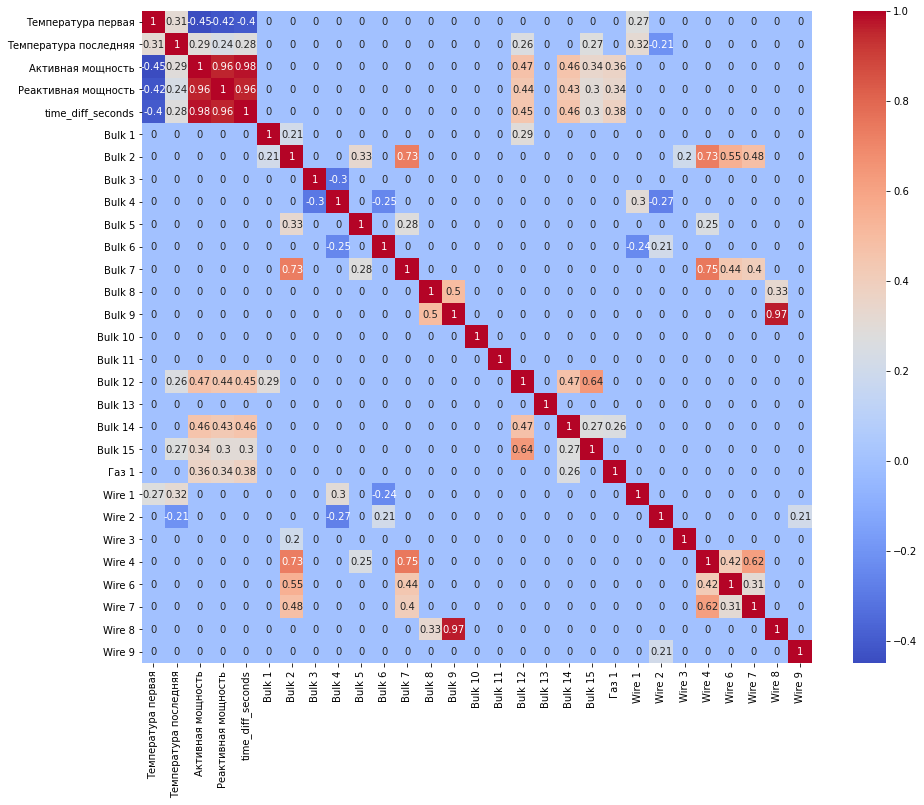

In [131]:
# Построение матрицы корреляций.
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix) < 0.2] = 0
corr_matrix = np.round(corr_matrix, 2)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True);

На матрице корреляций можно налюдать две группы линейно зависимых признаков с коэффициентом более 0.9.

***

Первая группа включает следующие признаки:
- Активная мощность;
- Реактивная мощность;
- суммарное время работы электродов в секундах `time_diff_seconds`.

Данную зависимость можно попробовать устранить при помощи генерации нового признака `Полная мощность` на основе признаков `Активная мощность` и `Реактивная мощность` согласно следующей формуле:

$$S = \sqrt{P^2 + Q^2}$$

где: $S$ - полная мощность, $P$ - активная мощность, $Q$ - реактивная мощность.

***

Вторая группа включает следующие признаки:
- данные о подаче сыпучих материалов (объём) `Bulk 9`;
- данные о проволочных материалах (объём) `Wire 8`.

Признаки практически полностью линейно зависимые, поэтому необходимо оставить только один из них. Оставим тот, у которого больше значений, отличных от нуля.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>С полной мощностью согласен, ОК.</p>
</div>

In [132]:
# Генерация нового признака "Полная мощность".
df['Полная мощность'] = (df['Активная мощность']**2 + df['Реактивная мощность']**2)**0.5

In [133]:
# Удаление коллинеарных признаков "Активная мощность" и "Реактивная мощность".
df = df.drop(columns=['Активная мощность', 'Реактивная мощность'])

In [134]:
# Вывод количества пропусков признака "Bulk 9".
(df['Bulk 9'] == 0).sum()

2311

In [135]:
# Вывод количества пропусков признака "Wire 8".
(df['Wire 8'] == 0).sum()

2311

Количество пропусков у обоих признаков одинаково поэтому можно исключить любой из них. Исключим `Bulk 9` так как он имеет корреляцию с признаком `Bulk 8`, коэффициент корреляции 0.5.

In [136]:
# Удаление коллинеарного признака "Bulk 9".
df = df.drop(columns=['Bulk 9'])

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>ОК</p>
</div>

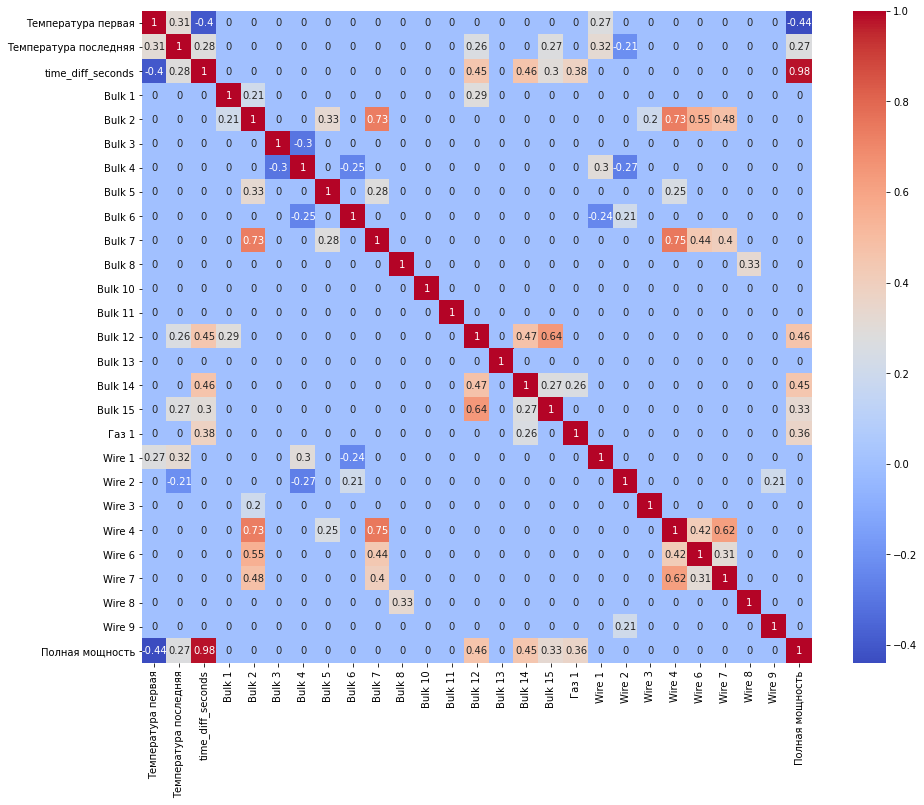

In [137]:
# Построение матрицы корреляций.
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix) < 0.2] = 0
corr_matrix = np.round(corr_matrix, 2)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True);

Коллинеарность между признаками `Полная мощность` и временем работы электродов `time_diff_seconds` продолжает сохраняться. Данная зависимость может быть устранена при помощи генерации нового признака - `Работа` согласно следующей формуле:

$$A = P * \triangle t$$

где: $A$ - работа, $P$ - мощность, $\triangle t$ - время.

In [138]:
# Генерация нового признака "Работа".
df['Работа'] = df['Полная мощность'] * df['time_diff_seconds']

In [139]:
# Удаление коллинеарных признаков "Полная мощность" и "time_diff_seconds мощность".
df = df.drop(columns=['Полная мощность', 'time_diff_seconds'])

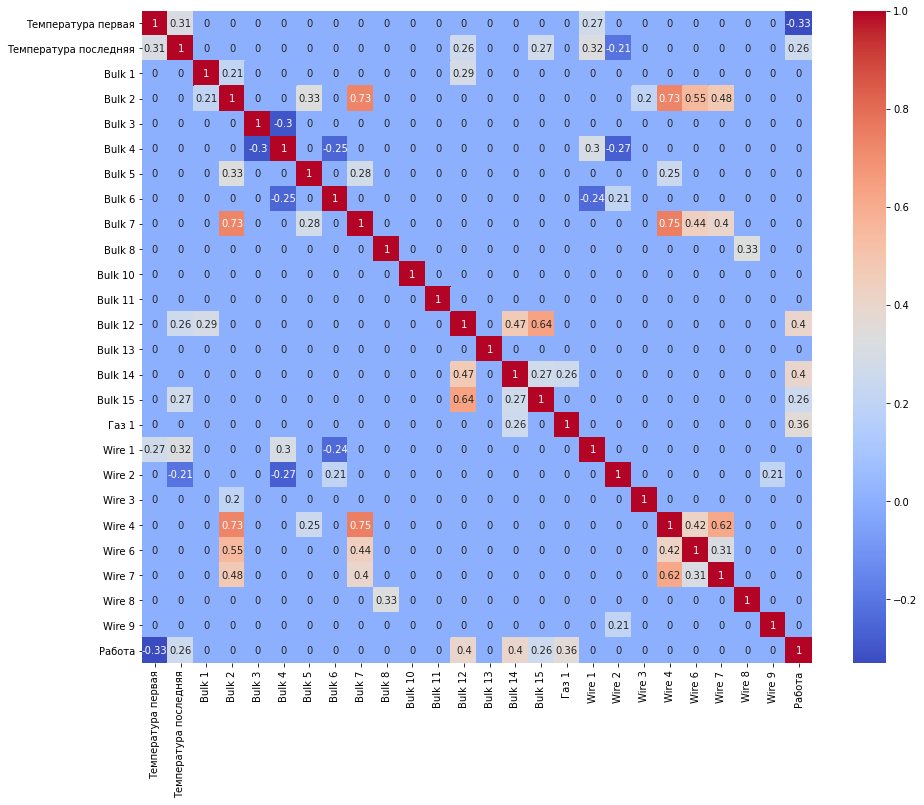

In [140]:
# Построение матрицы корреляций.
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix) < 0.2] = 0
corr_matrix = np.round(corr_matrix, 2)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True);

In [141]:
# Вывод общей информации о данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 1 to 2499
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Температура первая     2323 non-null   float64
 1   Температура последняя  2323 non-null   float64
 2   Bulk 1                 2323 non-null   float64
 3   Bulk 2                 2323 non-null   float64
 4   Bulk 3                 2323 non-null   float64
 5   Bulk 4                 2323 non-null   float64
 6   Bulk 5                 2323 non-null   float64
 7   Bulk 6                 2323 non-null   float64
 8   Bulk 7                 2323 non-null   float64
 9   Bulk 8                 2323 non-null   float64
 10  Bulk 10                2323 non-null   float64
 11  Bulk 11                2323 non-null   float64
 12  Bulk 12                2323 non-null   float64
 13  Bulk 13                2323 non-null   float64
 14  Bulk 14                2323 non-null   float64
 15  Bulk

Линейно зависимые признаки были устранены за счёт генерации новых и удаления старых признаков.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Что ж, самое сложное позади) впереди только моделирование.</p>
</div>

## Разбиение данных на обучающую и тестовую выборки

In [142]:
# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Температура последняя']),
    df['Температура последняя'],
    test_size=TEST_PART,
    random_state=GLOBAL__RANDOM_STATE
)

# Проверка: вывод размерностей выборок.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1858, 25), (465, 25), (1858,), (465,))

Данные готовы для построения моделей машинного обучения.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>понятно</p>
</div>

# Построение модели машинного обучения

## Поставновка задачи машинного обучения

Для решения поставленной бизнес-задачи необходимо построить модель, которая спрогнозирует температуру партии сырья. Температура - непрерывная величина, что означает задачу регрессии.

Для оценки качества прогноза будет использована метрика `MAE` - средняя абсолютная ошибка.

## Исследование моделей

Для решения поставленной задачи рассмотрим следующие модели:
1. Линейные модели.
2. Модель, основанная на методе ближайших соседей.
3. Дерево решений для регрессии и случайный лес.
4. Градиентный бустинг.

### Dummy-модель для проверки адекватности

In [143]:
# Инициализация Dummy-модели.
model_dummy = DummyRegressor()

In [144]:
# Обучение.
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [145]:
# Предсказание.
y_pred = model_dummy.predict(X_test)

In [146]:
# Датафрам для метрик.
df_metrics = pd.DataFrame()

# Вычисление метрики.
df_metrics.loc['DummyRegressor', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor  8.01

Метрика качества Dummy-модели в дальнейшем будет использоваться для проверки адекватности построенных моделей.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Есть ориентир для нас)</p>
</div>

### Линейные модели

#### Подготовка данных

Для лучшей эффективности линейных моделей необходима подготовка данных: стандартизация и добавление перехвата.

In [147]:
# Создание копии датасетов для линейных моделей.
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()

In [148]:
# Добавление нового признака перехват "bias".
X_train_linear['bias'] = 1
X_test_linear['bias'] = 1

In [149]:
# Стандартизация признаков.
ss = StandardScaler()

X_train_linear = ss.fit_transform(X_train_linear)
X_test_linear = ss.transform(X_test_linear)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>раздельное масштабирование, хорошо.</p>
</div>

#### Построение линейной регрессии

In [150]:
# Инициализация линейной регрессии.
model_lr = LinearRegression(n_jobs=-1)

In [151]:
# Обучение модели.
model_lr.fit(X_train_linear, y_train)

LinearRegression(n_jobs=-1)

In [152]:
# Предсказание.
y_pred = model_lr.predict(X_test_linear)

In [153]:
# Вычисление метрики.
df_metrics.loc['LinearRegression', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor    8.01
LinearRegression  6.42

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>есть результат)</p>
</div>

#### Усовершенствование линейной регрессии

Оценим коэффициенты признаков, также сравним их с бесполезным признаком шум "NOISE".

In [154]:
# Вывод размерности матрицы признаков.
X_train_linear.shape

(1858, 26)

In [155]:
# Генерация нового признака - семплирование из стандартного нормального распределения.
X_train_linear_noise = np.concatenate((X_train_linear, np.random.normal(size=(X_train_linear.shape[0], 1))), axis=1)

In [156]:
# Вывод размерности матрицы признаков с шумом.
X_train_linear_noise.shape

(1858, 27)

In [157]:
# обучение модели.
model_lr.fit(X_train_linear_noise, y_train)

LinearRegression(n_jobs=-1)

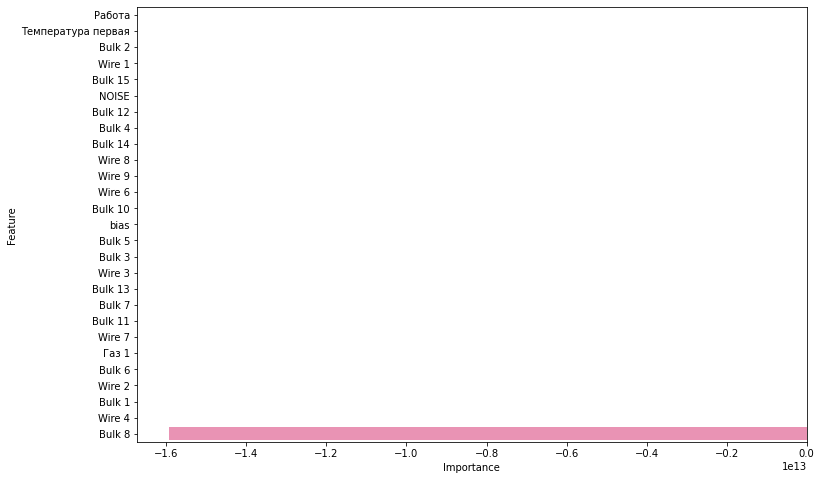

In [158]:
# Построение графика весов признаков.
plt.figure(figsize=(12, 8))

list_features = [*X_train.columns]
list_features.append('bias')
list_features.append('NOISE')

df_features = pd.DataFrame(data=model_lr.coef_, columns=['Importance'])
df_features['Feature'] = list_features
df_features = df_features.sort_values(by=['Importance'], ascending=False)

sns.barplot(x=df_features['Importance'], y=df_features['Feature']);

На графике можно наблюдать, что следующие признаки имеют веса, близкие к весу бесполезного признака `NOISE`:
- `Wire 9`,
- `Wire 8`,
- `Wire 6`,
- `Bulk 10`,
- `Bulk 8`,
- `Bulk 5`,
- `Bulk 3`,
- `Wire 3`.

Это значит, что даные признаки обладают малой информативностью для модели и могут быть удалены.

Следует отметить, что признаки `Работа`, `Температура первая` и другие имеют значительно большие веса, что может свидетельствовать о переобучении модели. Для борьбы с переобучением может быть использована L1 регуляризация.

Также необходимо добавить полиномизацию признаков, чтобы модель смогла уловить нелинейные зависимости.

После полиномизации количество признаков значительно увеличится. Отобрать наиболее важные поможет L2 регуляризация, которая также будет штрафовать коллинеарные признаки.

L1 и L2 регуляции реализованы в линейной моделе `ElasticNet`.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>Понял, идём дальше.</p>
</div>

In [159]:
# Формирование списка наиболее важных признаков.
list_features_important = [*df_features[np.abs(df_features['Importance']) > 0.2]['Feature']]

# Исключения признака-шума.
list_features_important = [feature for feature in list_features_important if feature != 'NOISE']

# Вывод списка.
list_features_important

['Работа',
 'Температура первая',
 'Bulk 2',
 'Wire 1',
 'Bulk 15',
 'Bulk 12',
 'Bulk 4',
 'Bulk 14',
 'Bulk 13',
 'Bulk 7',
 'Bulk 11',
 'Wire 7',
 'Газ 1',
 'Bulk 6',
 'Wire 2',
 'Bulk 1',
 'Wire 4',
 'Bulk 8']

In [160]:
# Функция для полиномизации второй степени.
def polynomization_2(dataframe_original, bias=True):
    dataframe = dataframe_original.copy()
    list_features_1 = dataframe.columns
    list_features_2 = list_features_1.copy()
    
    for feature_1 in list_features_1:
        for feature_2 in list_features_2:
            dataframe[f'{feature_1}_{feature_2}'] = dataframe[feature_1] * dataframe[feature_2]
        if len(list_features_2) > 1:
            list_features_2 = list_features_2[1:]
    
    if bias == True:
        dataframe['bias'] = 1
    
    dataframe = dataframe.drop(columns=list_features_1)
    
    return dataframe

In [161]:
# Создание копии датасетов ля линейных моделей.
X_train_linear = polynomization_2(X_train[list_features_important])
X_test_linear = polynomization_2(X_test[list_features_important])

In [162]:
# Проверка: вывод размерностей.
X_train_linear.shape, X_test_linear.shape

((1858, 172), (465, 172))

In [163]:
# Стандартизация признаков.
ss = StandardScaler()

X_train_linear = ss.fit_transform(X_train_linear)
X_test_linear = ss.transform(X_test_linear)

In [164]:
# Инициализация кросс-валидации ElasticNet.
model_elastic = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
    max_iter=10000,
    n_jobs=-1,
    random_state=GLOBAL__RANDOM_STATE
)

In [165]:
%%time

# Обучение модели.
model_elastic.fit(X_train_linear, y_train)

CPU times: user 34.3 s, sys: 41.7 s, total: 1min 15s
Wall time: 1min 16s


ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000,
             n_jobs=-1, random_state=29082022)

In [166]:
# Вывод доли объяснённой дисперсии целевой переменной.
np.round(model_elastic.score(X_train_linear, y_train), 3)

0.513

In [167]:
# Предсказание.
y_pred = model_elastic.predict(X_test_linear)

In [168]:
# Вычисление метрики.
df_metrics.loc['ElasticNet', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor    8.01
LinearRegression  6.42
ElasticNet        6.29

Отбор наиболее важных признаков, полиномизация и применение регуляризации позволили улучшить метрику качества линейной модели.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>ОК</p>
</div>

### Модель, основанная на методе ближайших соседей

#### Подготовка данных

Для лучшей эффективности модели необходимо нормализовать признаки.

In [169]:
# Создание копии датасетов.
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()

In [170]:
# Стандартизация признаков.
nn = Normalizer()

X_train_knn = ss.fit_transform(X_train_knn)
X_test_knn = ss.transform(X_test_knn)

#### Построение модели

In [171]:
# Набор параметров для перебора.
knn_params = {
    'n_neighbors': [*range(3, 15, 2)],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Кросс-валидация KNeighborsRegressor.
model_knn = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knn_params,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5,
    random_state=GLOBAL__RANDOM_STATE
)

In [172]:
# Обучение модели.
model_knn.fit(X_train_knn, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 13],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=29082022, scoring='neg_mean_absolute_error')

In [173]:
# Вывод наилучшей модели.
model_knn.best_estimator_

KNeighborsRegressor(n_neighbors=13, p=1, weights='distance')

In [174]:
%%time

# Предсказание.
y_pred = model_knn.predict(X_test_knn)

CPU times: user 23.2 ms, sys: 11.1 ms, total: 34.3 ms
Wall time: 33.1 ms


In [175]:
# Вычисление метрики.
df_metrics.loc['KNeighborsRegressor', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor       8.01
LinearRegression     6.42
ElasticNet           6.29
KNeighborsRegressor  6.71

Модель, основанная на методе ближайших соседей, уступила по качеству линеным моделям, но прошла проверку на адекватность.

Попробуем выполнить выбор наиболее важных признаков.

#### Выбор наиболее важных признаков

In [427]:
# Создание копии датасетов.
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()

In [428]:
# Стандартизация признаков.
nn = Normalizer()

X_train_knn = ss.fit_transform(X_train_knn[list_features_important])
X_test_knn = ss.transform(X_test_knn[list_features_important])

In [429]:
# Обучение модели.
model_knn.fit(X_train_knn, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 13],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=29082022, scoring='neg_mean_absolute_error')

In [430]:
# Вывод наилучшей модели.
model_knn.best_estimator_

KNeighborsRegressor(n_neighbors=13, p=1, weights='distance')

In [431]:
%%time

# Предсказание.
y_pred = model_knn.predict(X_test_knn)

CPU times: total: 62.5 ms
Wall time: 4.99 ms


In [432]:
# Вычисление метрики.
df_metrics.loc['KNeighborsRegressor__important_features', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor                           8.01
LinearRegression                         6.42
ElasticNet                               6.29
KNeighborsRegressor                      6.71
KNeighborsRegressor__important_features  6.59

Выбор наиболее важных признаков позволил улучшить метрику качества модели, однако она всё ещё уступает линейным моделям.

### Дерево решений для регрессии и случайный лес

Деревья решений не требуют подготовки данных, хотя она и может ускорить обучение построение модели в некоторых случаях, поэтому сразу приступим к построению моделей.

#### Дерево решений

In [444]:
# Набор параметров для перебора.
dt_params = {
    'max_depth': [*range(2, 10, 1)],
    'min_samples_split': [*range(5, 50, 5)]
}

# Кросс-валидация KNeighborsRegressor.
model_dt = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=dt_params,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5,
    random_state=GLOBAL__RANDOM_STATE
)

In [445]:
%%time

# Обучение модели.
model_dt.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 1.01 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45]},
                   random_state=29082022, scoring='neg_mean_absolute_error')

In [446]:
# Вывод наилучшей модели.
model_dt.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=35)

In [447]:
%%time

# Предсказание.
y_pred = model_dt.predict(X_test)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [448]:
# Вычисление метрики.
df_metrics.loc['DecisionTreeRegressor', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor                           8.01
LinearRegression                         6.42
ElasticNet                               6.29
KNeighborsRegressor                      6.71
KNeighborsRegressor__important_features  6.59
DecisionTreeRegressor                    6.85

Дерево решений уступило всем предыдущим моделям. Попробуем выполнить отбор признаков.

#### Выбор наиболее важных признаков

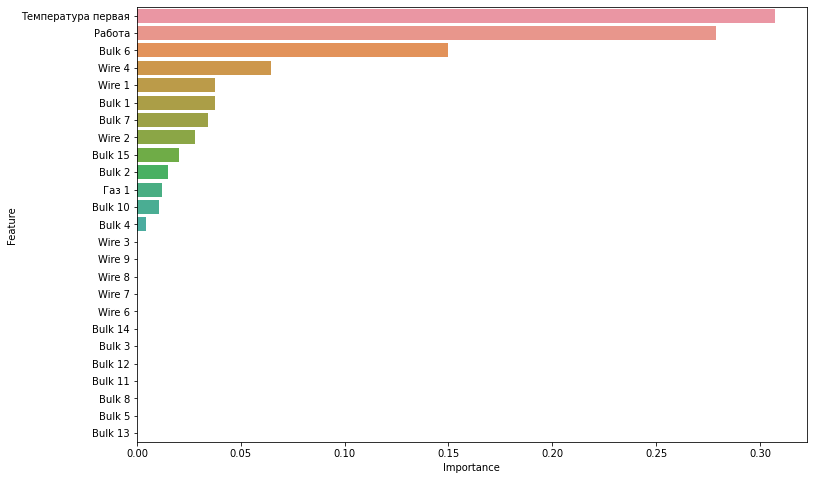

In [453]:
# Построение графика весов признаков.
plt.figure(figsize=(12, 8))

list_features = [*X_train.columns]

df_features = pd.DataFrame(data=model_dt.best_estimator_.feature_importances_, columns=['Importance'])
df_features['Feature'] = list_features
df_features = df_features.sort_values(by=['Importance'], ascending=False)

sns.barplot(x=df_features['Importance'], y=df_features['Feature']);

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта"). И этот баллст можно исключить и перестроить модель. Метрика не должна силно измениться. 

In [463]:
# Список наиболее важных признаков.
list_features_important = [*df_features[df_features['Importance'] > 0.05]['Feature']]

list_features_important

In [464]:
%%time

# Обучение модели.
model_dt.fit(X_train[list_features_important], y_train)

CPU times: total: 46.9 ms
Wall time: 73.8 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45]},
                   random_state=29082022, scoring='neg_mean_absolute_error')

In [465]:
# Вывод наилучшей модели.
model_dt.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=35)

In [466]:
%%time

# Предсказание.
y_pred = model_dt.predict(X_test[list_features_important])

CPU times: total: 0 ns
Wall time: 998 µs


In [467]:
# Вычисление метрики.
df_metrics.loc['DecisionTreeRegressor__important_features', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor                             8.01
LinearRegression                           6.42
ElasticNet                                 6.29
KNeighborsRegressor                        6.71
KNeighborsRegressor__important_features    6.59
DecisionTreeRegressor                      6.85
DecisionTreeRegressor__important_features  6.70

Выбор наиболее важных признаков позволил улучшить метрику, но модель всё равно уступает предыдущим моделям.

#### Случайный лес

In [468]:
# Набор параметров для перебора.
rf_params = {
    'n_estimators': [*range(50, 200, 50)],
    'max_depth': [*range(2, 10, 1)],
    'min_samples_split': [*range(5, 50, 5)]
}

# Кросс-валидация KNeighborsRegressor.
model_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rf_params,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5,
    random_state=GLOBAL__RANDOM_STATE
)

In [469]:
%%time

# Обучение модели.
model_rf.fit(X_train, y_train)

CPU times: total: 688 ms
Wall time: 5.46 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45],
                                        'n_estimators': [50, 100, 150]},
                   random_state=29082022, scoring='neg_mean_absolute_error')

In [470]:
# Вывод наилучшей модели.
model_rf.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_split=15, n_estimators=150)

In [471]:
%%time

# Предсказание.
y_pred = model_rf.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 14 ms


In [472]:
# Вычисление метрики.
df_metrics.loc['RandomForestRegressor', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor                             8.01
LinearRegression                           6.42
ElasticNet                                 6.29
KNeighborsRegressor                        6.71
KNeighborsRegressor__important_features    6.59
DecisionTreeRegressor                      6.85
DecisionTreeRegressor__important_features  6.70
RandomForestRegressor                      5.88

Случайный лес решений показал наилучший результат среди всех моделей. Попробуем проанализировать важность признаков и сделать отбор.

#### Выбор наиболее важных признаков

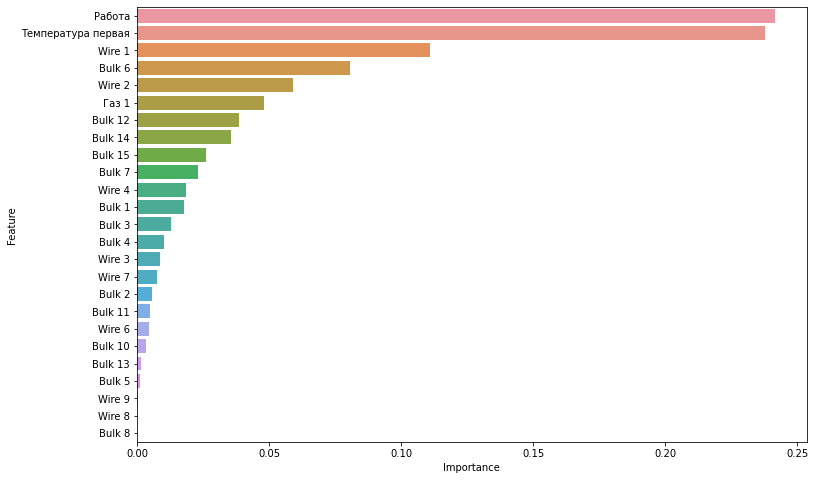

In [475]:
# Построение графика весов признаков.
plt.figure(figsize=(12, 8))

list_features = [*X_train.columns]

df_features = pd.DataFrame(data=model_rf.best_estimator_.feature_importances_, columns=['Importance'])
df_features['Feature'] = list_features
df_features = df_features.sort_values(by=['Importance'], ascending=False)

sns.barplot(x=df_features['Importance'], y=df_features['Feature']);

In [478]:
# Список наиболее важных признаков.
list_features_important = [*df_features[df_features['Importance'] > 0.01]['Feature']]

list_features_important

In [479]:
%%time

# Обучение модели.
model_rf.fit(X_train[list_features_important], y_train)

CPU times: total: 719 ms
Wall time: 4.97 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45],
                                        'n_estimators': [50, 100, 150]},
                   random_state=29082022, scoring='neg_mean_absolute_error')

In [480]:
# Вывод наилучшей модели.
model_rf.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=30, n_estimators=150)

In [481]:
%%time

# Предсказание.
y_pred = model_rf.predict(X_test[list_features_important])

CPU times: total: 15.6 ms
Wall time: 13 ms


In [482]:
# Вычисление метрики.
df_metrics.loc['RandomForestRegressor__important_features', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor                             8.01
LinearRegression                           6.42
ElasticNet                                 6.29
KNeighborsRegressor                        6.71
KNeighborsRegressor__important_features    6.59
DecisionTreeRegressor                      6.85
DecisionTreeRegressor__important_features  6.70
RandomForestRegressor                      5.88
RandomForestRegressor__important_features  5.98

Отбор признаков ухудшил результат. Значит, даже наименее важные признаки информативны для достаточно сложной модели, чтобы выявить зависимости с целевой переменной.

### Градиентный бустинг

Градиентный бустинг считается одним из наиболее мощных алгоритмов машинного обучения. Для него также некритична предобработка данных.

In [490]:
# Набор параметров для перебора.
gb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'n_estimators': [*range(50, 200, 50)],
    'max_depth': [*range(2, 10, 1)],
    'min_samples_split': [*range(5, 50, 5)]
}

# Кросс-валидация KNeighborsRegressor.
model_gb = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=gb_params,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5,
    random_state=GLOBAL__RANDOM_STATE
)

In [491]:
%%time

# Обучение модели.
model_gb.fit(X_train, y_train)

CPU times: total: 484 ms
Wall time: 10.2 s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45],
                                        'n_estimators': [50, 100, 150]},
                   random_state=29082022, scoring='neg_mean_absolute_error')

In [492]:
# Вывод наилучшей модели.
model_gb.best_estimator_

GradientBoostingRegressor(max_depth=4, min_samples_split=40)

In [493]:
%%time

# Предсказание.
y_pred = model_gb.predict(X_test)

CPU times: total: 0 ns
Wall time: 1.99 ms


In [494]:
# Вычисление метрики.
df_metrics.loc['GradientBoostingRegressor', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor                             8.01
LinearRegression                           6.42
ElasticNet                                 6.29
KNeighborsRegressor                        6.71
KNeighborsRegressor__important_features    6.59
DecisionTreeRegressor                      6.85
DecisionTreeRegressor__important_features  6.70
RandomForestRegressor                      5.88
RandomForestRegressor__important_features  5.98
GradientBoostingRegressor                  5.93

Алгоритм градиентного бустинга показал отличный результат после случайного леса. Оценим важность признаков и выберем наиболее приоритетные.

#### Выбор наиболее важных признаков

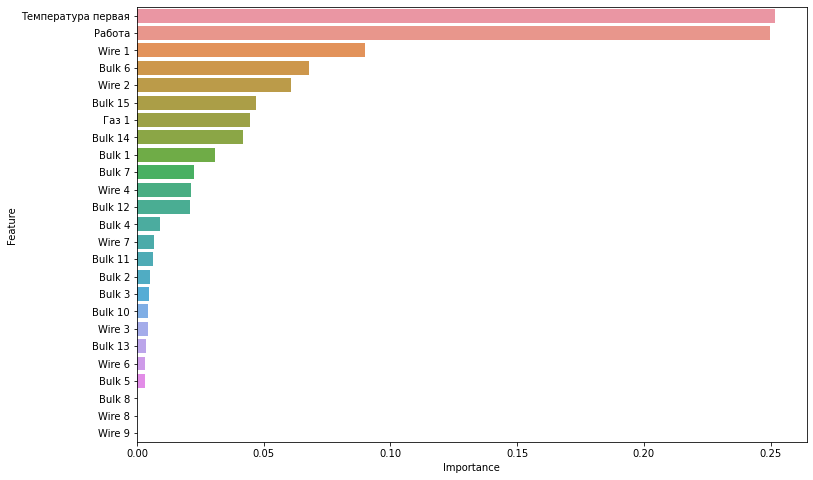

In [495]:
# Построение графика весов признаков.
plt.figure(figsize=(12, 8))

list_features = [*X_train.columns]

df_features = pd.DataFrame(data=model_gb.best_estimator_.feature_importances_, columns=['Importance'])
df_features['Feature'] = list_features
df_features = df_features.sort_values(by=['Importance'], ascending=False)

sns.barplot(x=df_features['Importance'], y=df_features['Feature']);

In [496]:
# Список наиболее важных признаков.
list_features_important = [*df_features[df_features['Importance'] > 0.01]['Feature']]

list_features_important

['Температура первая',
 'Работа',
 'Wire 1',
 'Bulk 6',
 'Wire 2',
 'Bulk 15',
 'Газ 1',
 'Bulk 14',
 'Bulk 1',
 'Bulk 7',
 'Wire 4',
 'Bulk 12']

In [497]:
%%time

# Обучение модели.
model_gb.fit(X_train[list_features_important], y_train)

CPU times: total: 406 ms
Wall time: 8.45 s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45],
                                        'n_estimators': [50, 100, 150]},
                   random_state=29082022, scoring='neg_mean_absolute_error')

In [498]:
# Вывод наилучшей модели.
model_rf.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=30, n_estimators=150)

In [499]:
%%time

# Предсказание.
y_pred = model_gb.predict(X_test[list_features_important])

CPU times: total: 0 ns
Wall time: 2.01 ms


In [500]:
# Вычисление метрики.
df_metrics.loc['GradientBoostingRegressor__important_features', 'MAE'] = np.round(mean_absolute_error(y_test, y_pred), 2)

# Вывод метрик.
df_metrics

MAE
DummyRegressor                                 8.01
LinearRegression                               6.42
ElasticNet                                     6.29
KNeighborsRegressor                            6.71
KNeighborsRegressor__important_features        6.59
DecisionTreeRegressor                          6.85
DecisionTreeRegressor__important_features      6.70
RandomForestRegressor                          5.88
RandomForestRegressor__important_features      5.98
GradientBoostingRegressor                      5.93
GradientBoostingRegressor__important_features  5.98

Аналогично со случайным лесом, градиентный бустинг является достаточно сложным алгоритмом, чтобы найти наиболее тонкие зависимости даже среди менее важных признаков. Поэтому отбор признаков ухудшает результат.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Сергей, однозначно сильная работа!!!<br>
Я бы привёл ещё такие эпитеты: смелый, аналитический, вдумчивый проект.<br>
Обработка данных, размышления над факторами, многогранная интересная модельная работа!!!!, конечные результаты, графика - многое удалось как надо. Можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br> 
 
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Что по проекту ещё:<br><br>
В общем-то, принципиальных вопросов нет у меня. По выбросам - оставил комментарии.<br>

Единственное, вот что попросил бы сделать: На консультации мы условились, что на трайне определяем лучшую модкекль. И только её тестим на тесте. Вот этот момент только скорректируй, пожалуйста.<br>
Может у тебя есть какие воапросы ещё?<br>
    
Спасибо. БУДУ ЖДАТЬ)

## Выводы

В ходе исследования моделей на предмет решения сформулированной задачи были получены следующие результаты:

1. Все модели прошли проверку на адекватность, показав метрику лучше, чем у модели `DummyRegressor` со стратегией прогноза `mean`. Это значит, что использование моделей машинного обучения целесообразно.


2. Наилучшие результаты показали наиболее сложные модели `RandomForestRegressor` и `GradientBoostingRegressor` со значениями метрики `MAE` 5.88 и 5.93 соответственно. Алгоритмы данных моделей смогли извлечь информацию даже из наименее важных признаков. Модели, основанные на деревьях, склонны к переобучению, поэтому была использована кросс-валидация.


3. Третье место заняла линейная модель `ElasticNet`. Для данной модели потребовалась подготовка данных: стандартизация и полиномизация признаков. Возможно, потенциал данной модели не раскрыт полностью, однако полиномизация более высокой степени приведёт к существенному увеличению затрат вычислительных мощностей.


4. Модели `KNeighborsRegressor` и `DecisionTreeRegressor` прошли проверку на адекватность, но показали посредственный результат по сравнению со своими коллегами.


5. Анализ важности признаков показал, что разные алгоритмы иначе оценивают информативность признаков. Однако можно выделить наиболее важные признаки для всех моделей: `Температура первая` и `Работа`. Последний признак был сгенерирован на основе других признаков, что доказывает эффективность техники `feature engineering`.